# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

### Here's what I'll do for validation and cleaning of each column:

- **week**: Ensure it's a numeric column with no negative or non-integer values.
- **sales_method**: Confirm that each entry matches one of the three expected methods.
- **customer_id**: Check for unique values.
- **nb_sold**: Make sure it's numeric, non-negative, and an integer.
- **revenue**: It should be numeric and rounded to two decimal places; handle NaN values appropriately.
- **years_as_customer**: It should be numeric, non-negative, and an integer since the company was founded in 1984 (40 years).
- **nb_site_visits**: Confirm that it's numeric, non-negative, and an integer.
- **state**: This should be a character field; no validation needed except for empty strings, perhaps.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

product_sales = pd.read_csv('product_sales.csv')
product_sales

week  sales_method  ... nb_site_visits          state
0         2         Email  ...             24        Arizona
1         6  Email + Call  ...             28         Kansas
2         5          Call  ...             26      Wisconsin
3         4         Email  ...             25        Indiana
4         3         Email  ...             28       Illinois
...     ...           ...  ...            ...            ...
14995     4          Call  ...             22   Pennsylvania
14996     5          Call  ...             27         Kansas
14997     1          Call  ...             22  West Virginia
14998     6          Call  ...             27     New Jersey
14999     5  Email + Call  ...             25       Illinois

[15000 rows x 8 columns]

In [2]:
product_sales.shape

(15000, 8)

In [3]:
product_sales.nunique()

week                     6
sales_method             5
customer_id          15000
nb_sold                 10
revenue               6743
years_as_customer       42
nb_site_visits          27
state                   50
dtype: int64

**All records in this dataset are under unique customers. 15000 unique customers in total.**

In [4]:
product_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [5]:
product_sales.describe()

week       nb_sold  ...  years_as_customer  nb_site_visits
count  15000.000000  15000.000000  ...       15000.000000    15000.000000
mean       3.098267     10.084667  ...           4.965933       24.990867
std        1.656420      1.812213  ...           5.044952        3.500914
min        1.000000      7.000000  ...           0.000000       12.000000
25%        2.000000      9.000000  ...           1.000000       23.000000
50%        3.000000     10.000000  ...           3.000000       25.000000
75%        5.000000     11.000000  ...           7.000000       27.000000
max        6.000000     16.000000  ...          63.000000       41.000000

[8 rows x 5 columns]

In [6]:
product_sales[product_sales['years_as_customer'] > (2024 - 1984)]

week sales_method  ... nb_site_visits       state
13741     2        Email  ...             24  California
13800     4         Call  ...             27  California

[2 rows x 8 columns]

Since the company was founded in 1984, the two records (**13741 & 13800**)contain incorrect values in the **years_as_customer** field. For the moment, I will leave these as they are, but I will mention this in the final recommendations. Additionally, I will be mindful of these anomalies when using the 'years_as_customer' data for future analyses

The **week**, **nb_sold**, **years_as_customer**, and **nb_site_visits** columns are confirmed to be non-negative integers.

In [7]:
product_sales.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [8]:
already_rounded_mask = product_sales['revenue'].round(2) == product_sales['revenue']
already_rounded_count = already_rounded_mask.sum()

already_rounded_count == product_sales['revenue'].notnull().sum()

True

The **revenue** column is indeed converted to numeric with two decimal places, though there are NaN values present. 
I will adress it after validating **'sales_method'** column

In [9]:
unique_sales_methods = product_sales['sales_method'].unique()
unique_sales_methods

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

In [10]:
valid_methods = ['Email', 'Call', 'Email + Call']
product_sales[~product_sales['sales_method'].isin(valid_methods)]

week sales_method  ... nb_site_visits           state
22        3    em + call  ...             21  North Carolina
603       1    em + call  ...             19            Ohio
954       5    em + call  ...             30      California
1260      4    em + call  ...             28        Maryland
1674      5    em + call  ...             28      Washington
1693      1        email  ...             22      California
2174      3        email  ...             26         Indiana
3598      4    em + call  ...             34       Minnesota
3601      2    em + call  ...             23    Pennsylvania
3635      3    em + call  ...             22           Texas
4427      5    em + call  ...             27        New York
4715      5    em + call  ...             30      California
5187      5        email  ...             29      California
5325      3        email  ...             22  North Carolina
5329      2        email  ...             28      California
5483      4    em + call  ...             23        New York
5946      3    em + call  ...             30        Michigan
5998      5    em + call  ...             28       Tennessee
6328      4        email  ...             21            Utah
6573      5    em + call  ...             29        Michigan
7547      4    em + call  ...             32           Texas
9163      4        email  ...             30      California
9887      5    em + call  ...             30        Illinois
11236     1        email  ...             24         Alabama
12583     5    em + call  ...             31         Indiana
12933     4    em + call  ...             27        New York
13249     4        email  ...             28        Maryland
13325     4    em + call  ...             27         Florida
13350     5    em + call  ...             28        Illinois
13513     4    em + call  ...             27         Georgia
13802     5    em + call  ...             29        Virginia
13980     4        email  ...             26         Indiana
14992     5    em + call  ...             34        New York

[33 rows x 8 columns]

The **sales_method** column contains inconsistent entries: **'em + call'** and **'email'**, which do not match the predefined categories of 'Email', 'Call', or 'Email + Call'. There are only 33 such entries. Ideally, I would check with the sales department if it's okay to interpret 'em + call' as 'Email + Call' and 'email' as 'Email'. However, considering the circumstances, it seems reasonable to replace these irregular entries with the established categories.

In [11]:
product_sales['sales_method'] = product_sales['sales_method'].apply(lambda x: x.replace('em + call', 'Email + Call').replace('email', 'Email'))
product_sales[~product_sales['sales_method'].isin(valid_methods)].count()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

Now all records in the **sales_method** column contain categories of **'Email'**, **'Call'**, or **'Email + Call'**

In [12]:
unique_states = product_sales['state'].unique()
unique_states

array(['Arizona', 'Kansas', 'Wisconsin', 'Indiana', 'Illinois',
       'Mississippi', 'Georgia', 'Oklahoma', 'Massachusetts', 'Missouri',
       'Texas', 'New York', 'Maryland', 'California', 'Tennessee',
       'Pennsylvania', 'North Dakota', 'Florida', 'Michigan',
       'North Carolina', 'Hawaii', 'Colorado', 'Louisiana', 'Virginia',
       'New Mexico', 'Arkansas', 'Alaska', 'Oregon', 'New Hampshire',
       'Ohio', 'New Jersey', 'Connecticut', 'Iowa', 'Montana',
       'Washington', 'Kentucky', 'Alabama', 'Nebraska', 'South Carolina',
       'Minnesota', 'South Dakota', 'Delaware', 'Maine', 'Utah',
       'West Virginia', 'Vermont', 'Rhode Island', 'Nevada', 'Idaho',
       'Wyoming'], dtype=object)

Back to missing values.

There are 1,074 missing values in the **revenue** column, which constitutes approximately 7.16% of our data. Considering this is a significant but not overwhelming portion of the data, we have 2 options:

- **Imputation**: Given that revenue is a key metric for analysis, we might want to impute missing values. However, we should consider the distribution of the revenue data and the sales methods to choose an appropriate imputation strategy.

- **Exclusion**: Since it's a reasonable amount of data and if the missing values are randomly distributed, we could also consider excluding these rows from our analysis. This decision might depend on whether the rows with missing data have any pattern or bias.

In [13]:
treshhold = len(product_sales) * 0.05
cols_with_missing_values = product_sales.columns[product_sales.isna().sum() <= treshhold ]
product_sales_dict = product_sales.groupby('sales_method')['revenue'].median().to_dict()
product_sales_imputed = product_sales.copy()
product_sales_imputed['revenue'] = product_sales['revenue'].fillna(product_sales_imputed['sales_method'].map(product_sales_dict))

product_sales_imputed.isna().sum()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

## Data validation and cleaning

### Here is a recap of the validation and cleaning performed on each column (20 hidden cells above):

**week**: A numeric column with values ranging from 1 to 6, including 6 unique values with no negative or non-integer values, without missing values. Representing 6 weeks of sale was made, counted as weeks since product launch. **No cleaning is needed.**

**sales_method**: column contained 33 inconsistent entries: **'em + call'** and **'email'**, which do not match the predefined categories of **'Email'**, **'Call'**, or **'Email + Call'**. Ideally, I would check with the sales department if it's okay to interpret 'em + call' as **'Email + Call'** and **'email'** as **'Email'**. However, considering the circumstances, it seemed reasonable to replace these irregular entries with the established categories. 
After replacement of inconsistent entries, records in the **sales_method** column contain character categories of **'Email'**, **'Call'**, or **'Email + Call'**

**customer_id**: contains unique customer IDs for all records, totaling 15,000 unique customers, with each ID stored as a text field. **No cleaning is needed, _however, insights into the effectiveness of sales methods on customer recurrence would be enhanced if the dataset included information on repeat purchase behavior._**

**nb_sold**: A numeric column with values ranging from 7 to 16, non-negative integers, representing number of new products sold. **No cleaning is needed.**

**revenue**: numeric and rounded to two decimal places values ranging from 32.54 to 238.32; There were 1,074 missing values in the **revenue** column, which constitutes approximately 7.16% of our data:

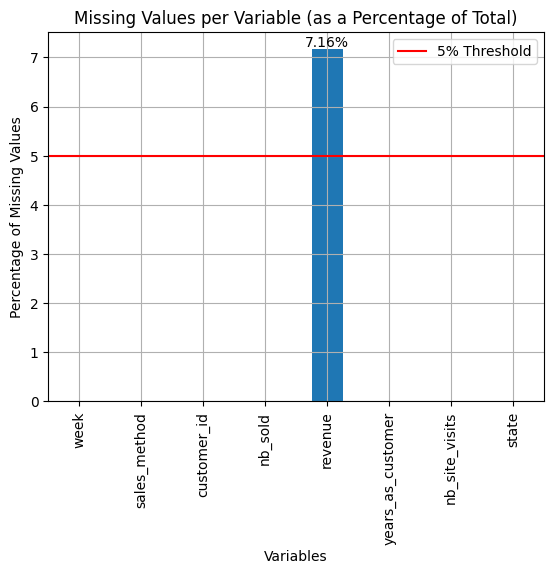

In [14]:
missing_percent = (product_sales.isna().sum() / len(product_sales)) * 100
missing_percent.plot(kind='bar')
plt.xlabel('Variables')
plt.ylabel('Percentage of Missing Values')
plt.grid(visible = True)
plt.title('Missing Values per Variable (as a Percentage of Total)')
plt.axhline(y=5, color='r', linestyle='-', label='5% Threshold')
revenue_index = missing_percent.index.tolist().index('revenue')
plt.text(revenue_index, 7.16, '7.16%', ha='center', va='bottom')
plt.legend()
plt.show()

- Considering this is a significant but not overwhelming portion of the data, I had 2 options:

-- **Imputation**: Given that revenue is a key metric for analysis, we might want to impute missing values. However, I should've considered the distribution of the revenue data and the sales methods to choose an appropriate imputation strategy.

-- **Exclusion**: Since it's a reasonable amount of data and if the missing values are randomly distributed, we could also consider excluding these rows from our analysis. This decision might depend on whether the rows with missing data have any pattern or bias.

<Figure size 1000x600 with 0 Axes>

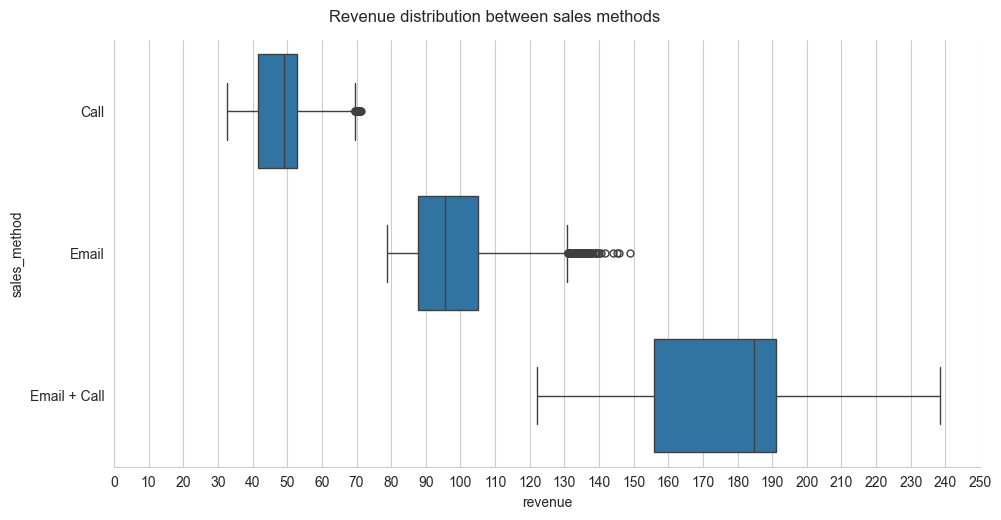

In [15]:
from matplotlib.ticker import MaxNLocator
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
g = sns.catplot(x = 'revenue', y = 'sales_method', data = product_sales, kind = 'box', height=5, aspect=2, order = ['Call', 'Email', 'Email + Call'])
g.ax.set_xlim(0,250)
g.ax.xaxis.set_major_locator(MaxNLocator(nbins='25'))
g.fig.suptitle('Revenue distribution between sales methods', y = 1.03)
plt.show()

The revenue distribution varies greatly between sales methods. Given the presence of outliers, using the median revenue for each sales method seemed to me as an effective strategy for imputation.

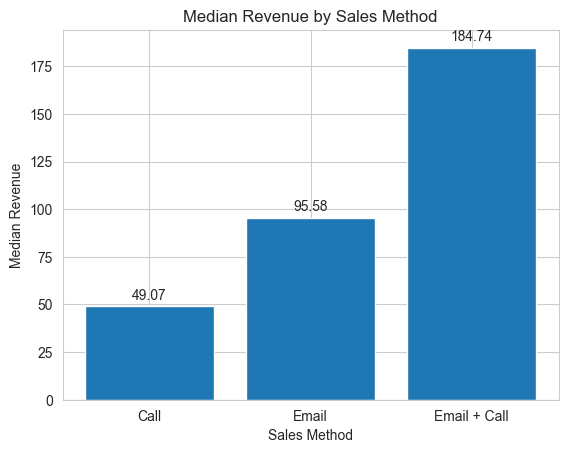

In [16]:
threshhold = len(product_sales) * 0.05
cols_with_missing_values = product_sales.columns[product_sales.isna().sum() > 0]

product_sales_dict = product_sales.groupby('sales_method')['revenue'].median().to_dict()

categories = list(product_sales_dict.keys())
values = list(product_sales_dict.values())
plt.bar(categories, values)
for i, value in enumerate(values):
    plt.text(i, value + 2, f'{value:.2f}', ha='center', va='bottom')
plt.xlabel('Sales Method')
plt.ylabel('Median Revenue')
plt.title('Median Revenue by Sales Method')
plt.show()

**years_as_customer**: A numeric column with values ranging from 0 to 63, with no negative or non-integer values, without missing values. Since the company was founded in 1984, the **two records contain incorrect values of more than 40 years in this field**. I will be mindful of these anomalies when using the 'years_as_customer' data for future analysis **by filtering them out** when using years_as_customer field and will mention this in the final recommendations for sales team.

**nb_site_visits**: A numeric column with values ranging from 12 to 41, non-negative integers, representing number of times the customer has visited our websitein the last 6 months **No cleaning is needed. Yet, additional data detailing site visits since introducing a new product line would offer a clearer perspective on how sales methods influence customer interest in our offerings.**

**state**: Character field with no empty strings, appears to include all valid U.S. states.  **No cleaning is needed.**

In [17]:
product_sales_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


## Exploratory Analysis

## How many customers were there for each approach?

In [18]:
product_sales_imputed.groupby('sales_method')['customer_id'].count()

sales_method
Call            4962
Email           7466
Email + Call    2572
Name: customer_id, dtype: int64

Based on the last 6 weeks of data, we observe that the email sales method attracted the highest number of customers, with a total of 7,466, which significantly exceeds those attracted by calls and the combined method of email and calls. 

The call-only method falls in the middle, drawing 4,962 customers. On the other end, the combined approach of email and calls has attracted the fewest customers, with a total of 2,572. This indicates that, while the combined method might be perceived as more personalized or engaging, it does not necessarily translate to a larger customer base compared to the other methods. Given that the email method required the least effort from the team and yielded the highest number of customers, it appears to be the most efficient strategy among the three tested methods. 

However, it's important to consider the revenue generated and customer retention to make a comprehensive evaluation of the sales method effectiveness.

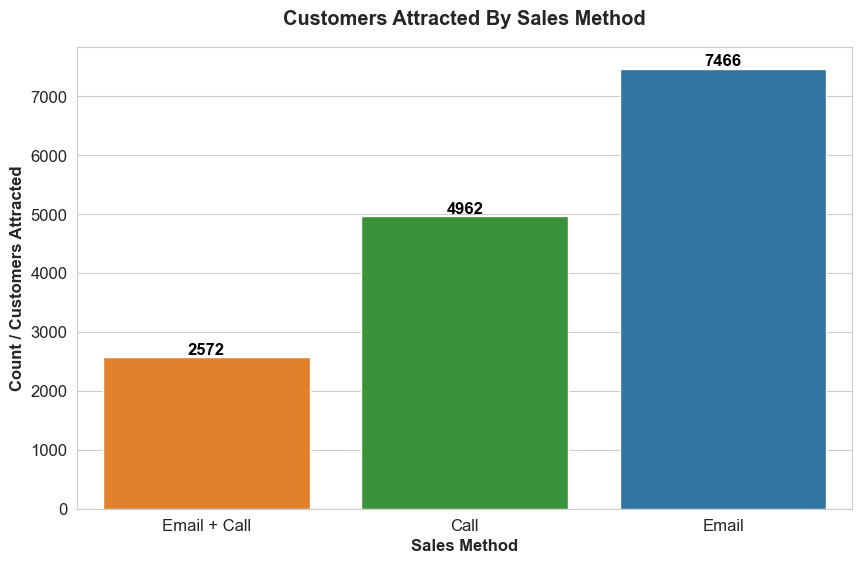

In [19]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
g = sns.countplot(x='sales_method', data=product_sales_imputed, hue='sales_method', order = ['Email + Call', 'Call', 'Email'])
g.set_title('Customers Attracted By Sales Method', y = 1.03, fontweight='bold', fontsize='x-large')
g.set_xlabel('Sales Method', fontweight='bold', fontsize='large')
g.set_ylabel('Count / Customers Attracted', fontweight='bold', fontsize='large')
plt.tick_params(axis='both', which='major', labelsize='large')
for p in g.patches:
    g.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
           ha='center', va='bottom', fontsize='large', fontweight='bold', color='black')
plt.show()

## What does the spread of the revenue look like overall?

The revenue distribution is visually summarized in the boxplot provided. This type of plot is excellent for understanding the spread and central tendency of a dataset. Here's an interpretation of the overall revenue spread:

**Median Revenue**: Positioned at **90.95**, the median indicates that half of the sales generated less revenue than this amount and the other half generated more. It serves as a robust measure of central tendency that is less affected by extreme values or outliers.

**Mean Revenue**: Marked by the red 'X', the mean revenue is about **95.57**. This value is slightly higher than the median, suggesting a distribution with a positive skew, where higher revenue sales are pulling the mean upwards.

**Interquartile Range (IQR)**: The box **represents the middle 50% of the revenue values**, spanning from the first quartile (Q1) at approximately 52.65 to the third quartile (Q3) at about 107.75. This range shows where the bulk of the revenues lie and **indicates variability in the middle half of the dataset**.

**Whiskers**: The "whiskers" extend to the smallest value in the data and largest value within 1.5 times the IQR from the quartiles, which are approximately **32.54** (lower whisker) and **190.40** (upper whisker). They give a sense of the **range of typical values** and can help identify outliers.

**Outliers**: Points beyond the whiskers are considered outliers. In this plot, we can see a group of outliers near the **maximum of 238.32**, which could be the result of a particularly large sale or an anomaly that may **require further investigation**.

The boxplot indicates that **there is a wide spread in revenue figures**, with a tail extending to higher revenues. This suggests that while many sales generate a moderate amount of revenue, there are a significant number of sales with higher revenues contributing to the overall performance.

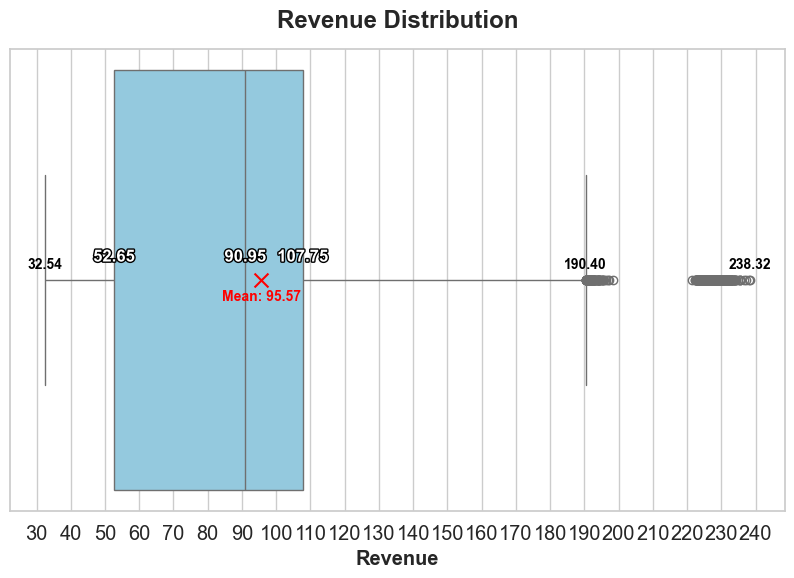

In [20]:
from matplotlib.ticker import MaxNLocator
from matplotlib import patheffects

sns.set_style('whitegrid')
sns.set_context('notebook')
plt.figure(figsize=(10, 6))
g = sns.boxplot(data=product_sales_imputed, x='revenue', color="skyblue")
g.set_title('Revenue Distribution', y=1.03, fontweight='bold', fontsize='x-large')
g.set_xlabel('Revenue', fontweight='bold', fontsize='large')
plt.tick_params(axis='both', which='major', labelsize='large')
g.xaxis.set_major_locator(MaxNLocator(nbins='25'))

max_whisker = g.lines[1].get_ydata()[1]
annotation_height = max_whisker + (max_whisker * 0.05)
mean_value = product_sales_imputed['revenue'].mean()
quantiles = product_sales_imputed['revenue'].quantile([0.25, 0.5, 0.75])

Q1 = product_sales_imputed['revenue'].quantile(0.25)
Q3 = product_sales_imputed['revenue'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker_value = Q1 - 1.5 * IQR
upper_whisker_value = Q3 + 1.5 * IQR

actual_lower_whisker = product_sales_imputed['revenue'][product_sales_imputed['revenue'] >= lower_whisker_value].min()
actual_upper_whisker = product_sales_imputed['revenue'][product_sales_imputed['revenue'] <= upper_whisker_value].max()
max_outlier = product_sales_imputed['revenue'].max()

plt.text(actual_lower_whisker, annotation_height - 0.03, f"{actual_lower_whisker:.2f}", 
         ha='center', va='center', fontweight='bold', color='black', fontsize='small')
plt.text(actual_upper_whisker, annotation_height - 0.03, f"{actual_upper_whisker:.2f}", 
         ha='center', va='center', fontweight='bold', color='black', fontsize='small')
plt.text(max_outlier, annotation_height - 0.03, f"{max_outlier:.2f}", 
         ha='center', va='center', fontweight='bold', color='black', fontsize='small')

plt.scatter(mean_value, 0, color='red', marker='x', s=100, zorder=5)
mean_label = f"Mean: {mean_value:.2f}"
plt.text(mean_value, 0.03, mean_label, 
         ha='center', va='center', fontweight='bold', color='r', fontsize='small')

for q in quantiles.index:
    text = plt.text(x=quantiles[q], y=annotation_height - 0.03, s=f"{quantiles[q]:.2f}", 
             ha='center', va='bottom', fontweight='bold', color='white')
    text.set_path_effects([patheffects.withStroke(linewidth=2, foreground='black')])
    
plt.show()

To further investigate a wide spread in revenue figures, I've constructed the histogram with a kernel density estimate that provides insight into the distribution of revenue. It shows a **multimodal distribution**, with notable **peaks occurring roughly every 50 units of revenue**. 

These peaks suggest that there are common price points for the products sold, which, when multiplied by the quantity sold, result in these revenue concentrations, which may be extremly valuable to identify customer buying habits and how they might strategically adjust their sales tactics to capitalize on the most common revenue-generating opportunities.

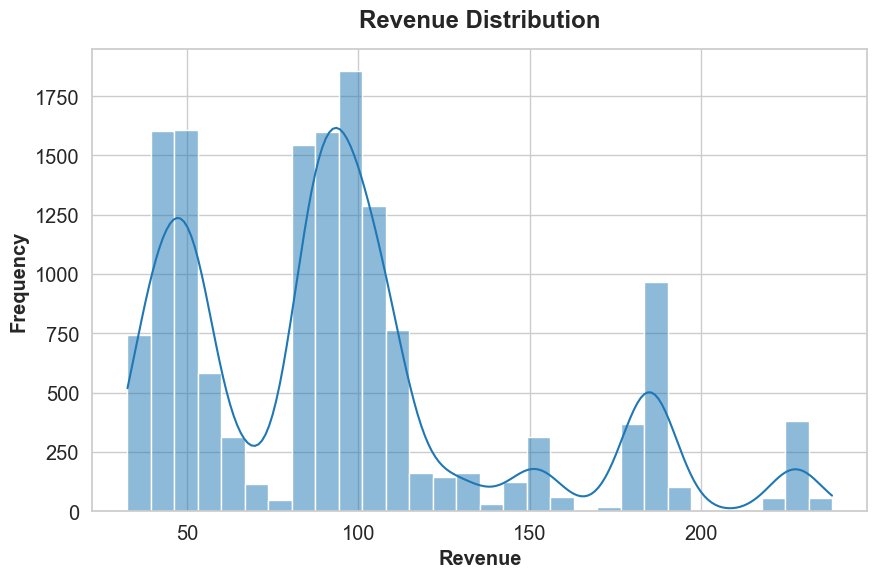

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
g = sns.histplot(data=product_sales_imputed, x='revenue', bins=30, kde=True)
g.set_title('Revenue Distribution', y=1.03, fontweight='bold', fontsize='x-large')
g.set_xlabel('Revenue', fontweight='bold', fontsize='large')
g.set_ylabel('Frequency', fontweight='bold', fontsize='large')
plt.tick_params(axis='both', which='major', labelsize='large')
plt.show()

In [22]:
product_sales_imputed['nb_sold'].median()

10.0

Median number of products sold per each sale is 10, therefore the recurring revenue peaks should correlate with the number of items sold, with a multiplier effect of ten. 

To further uncover this pattern, I introduced a column for **customers' average price per item sold**, calculated by dividing the revenue by the quantity of new products sold per each sale (customer). 

In [23]:
product_sales_imputed['average_price'] = product_sales_imputed['revenue'] / product_sales_imputed['nb_sold']

As expected, this chart shows that the average price tends to peak at  units 5, 10 and 15. This pattern will helps us understand how our revenue data and pricing are connected.

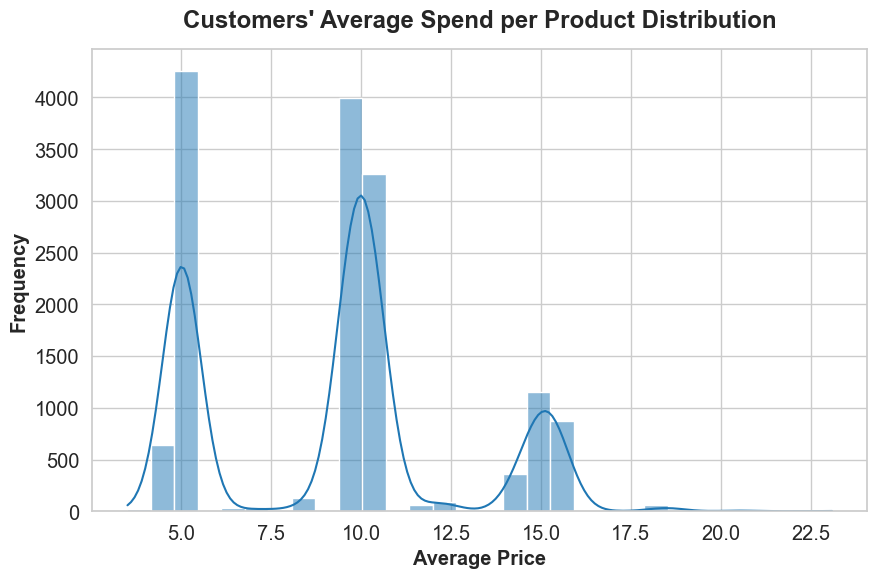

In [24]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
g = sns.histplot(data=product_sales_imputed, x='average_price', bins=30, kde=True)
g.set_title("Customers' Average Spend per Product Distribution", y=1.03, fontweight='bold', fontsize='x-large')
g.set_xlabel('Average Price', fontweight='bold', fontsize='large')
g.set_ylabel('Frequency', fontweight='bold', fontsize='large')
plt.tick_params(axis='both', which='major', labelsize='large')
plt.show()

To categorize the average prices into distinct segments and further understand their relationship with the revenue generated, I conducted a statistical analysis. Firstly, I employed a **Gaussian Kernel Density Estimate** (KDE) to the average price data to identify the distribution's shape and locate its peaks and troughs. 

The peaks represent the most common average price points, and the troughs signify potential boundaries between different price segments, that can be found below:

In [25]:
from scipy.signal import find_peaks
from scipy.stats import gaussian_kde

# KDE for the average price
kde = gaussian_kde(product_sales_imputed['average_price'])
x_d = np.linspace(min(product_sales_imputed['average_price']), max(product_sales_imputed['average_price']), 1000)

kde_values = kde(x_d)
prominence_threshold = 0.01 
peaks, properties = find_peaks(kde_values, prominence=prominence_threshold)
prominent_peaks = x_d[peaks]

# Find troughs 
troughs, _ = find_peaks(-kde_values, prominence=prominence_threshold)
cut_points = x_d[troughs]

# define bins for segmenting the data
bins = np.unique([min(product_sales_imputed['average_price']), *cut_points, max(product_sales_imputed['average_price'])])

print(bins)

[ 3.505       7.28917167 13.13208959 23.0925    ]


By defining a _prominence threshold_, I was able to distinguish significant peaks in the data. **These peaks were indicative of the most prevalent pricing categories within our customers purchases.**

I set up cut points that naturally segmented the price range into categories that I labeled as **"Cheap"**, **"Moderate"**, and **"Expensive"**. These segments were determined by the troughs in the KDE. I discovered that the **majority of sales fell into the "Moderate" price category**, followed by "Cheap," and then "Expensive.":

In [26]:
product_sales_imputed['average_price_category'] = pd.cut(product_sales_imputed['average_price'], bins=bins, labels=["Cheap", "Moderate", "Expensive"], include_lowest=True)

distribution = product_sales_imputed['average_price_category'].value_counts()
distribution

Moderate     7560
Cheap        4963
Expensive    2477
Name: average_price_category, dtype: int64

I visualized these findings using histograms overlaid with a KDE, color-coded by the newly created average price categories. 
Now we see a **clear division of the price categories**, each with its distinct peak frequency.

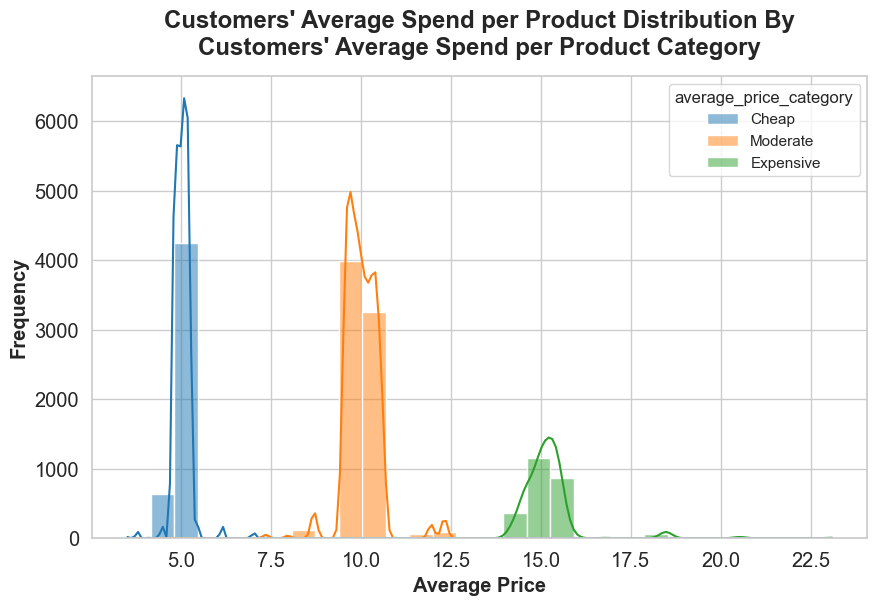

In [27]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
g = sns.histplot(data=product_sales_imputed, x='average_price', bins=30, kde=True, hue = 'average_price_category')
g.set_title("Customers' Average Spend per Product Distribution By\nCustomers' Average Spend per Product Category", y=1.03, fontweight='bold', fontsize='x-large')
g.set_xlabel('Average Price', fontweight='bold', fontsize='large')
g.set_ylabel('Frequency', fontweight='bold', fontsize='large')
plt.tick_params(axis='both', which='major', labelsize='large')
plt.show()

To make it easier, lets call " "**Customers' Average Spend per Product**" Category" as **Average Price Category** further.

The second histogram, '**Revenue Distribution by** Customers' **Average Price Category**' correlates the previously defined price categories with the revenue generated. 

This graph offers insights into which price categories are contributing the most to the revenue and helps identify patterns in customer purchasing behavior. **Expensive items contribute disproportionately to revenue**, this might influence inventory and marketing strategies.

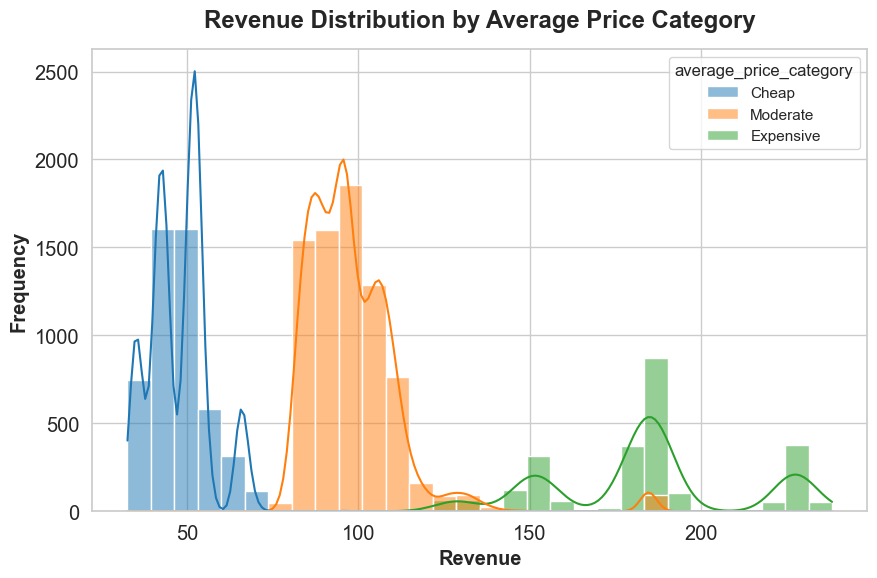

In [28]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
g = sns.histplot(data=product_sales_imputed, x='revenue', bins=30, kde=True, hue = 'average_price_category')
g.set_title('Revenue Distribution by Average Price Category', y=1.03, fontweight='bold', fontsize='x-large')
g.set_xlabel('Revenue', fontweight='bold', fontsize='large')
g.set_ylabel('Frequency', fontweight='bold', fontsize='large')
plt.tick_params(axis='both', which='major', labelsize='large')
plt.show()

This analysis part has provided a clearer insight into the underlying factors of the recurring peaks at specific revenue intervals, the nature of exceptionally high sales or outliers, the broad range in revenue figures, and the multimodal distribution of sales data.

## What does the spread of the revenue look like for each method?

The spread of the revenue across different sales methods has been quantitatively depicted in boxplot visualizations. It is evident that the revenue spread differs by sales method:

**Calls**: This **method shows a relatively lower average revenue** but with a consistent distribution, as indicated by the compact box and shorter whiskers.

**Emails**: **Display a wider range and higher revenue on average**, but with significant outliers that suggest **variability in sales performance**.

**Email + Call**: **Appears to have the highest average revenue**, denoted by the mean, and also **the widest range**, indicating a **diverse set of outcomes from this approach**.

<Figure size 1000x600 with 0 Axes>

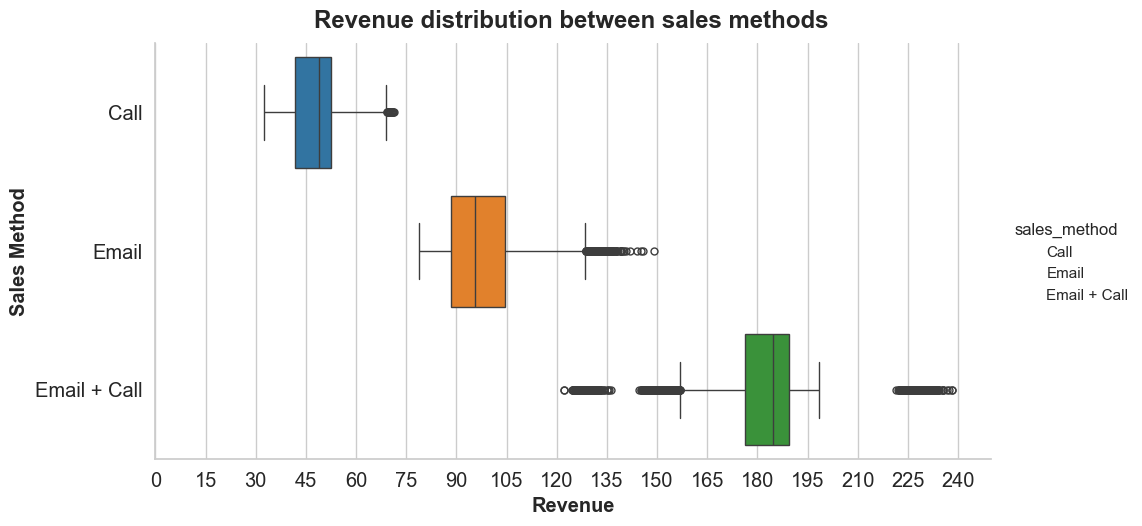

In [29]:
from matplotlib.ticker import MaxNLocator
sns.set_style('whitegrid')
sns.set_context('notebook')
plt.figure(figsize=(10, 6))
g = sns.catplot(x = 'revenue', y = 'sales_method', data = product_sales_imputed, kind = 'box', height=5, aspect=2, order = ['Call', 'Email', 'Email + Call'], hue = 'sales_method', hue_order = ['Call', 'Email', 'Email + Call'])
g.ax.set_xlim(0,250)
g.ax.set_xlabel('Revenue', fontweight='bold', fontsize='large')
g.ax.set_ylabel('Sales Method', fontweight='bold', fontsize='large')
plt.tick_params(axis='both', which='major', labelsize='large')
g.ax.xaxis.set_major_locator(MaxNLocator(nbins='20'))
g.fig.suptitle('Revenue distribution between sales methods', y = 1.03, fontweight='bold', fontsize='x-large')
plt.show()

This graph offers a quantitative deep dive into the revenue performance of different sales methods. The detailed annotations reveal the insights of the revenue distribution, such as the mean, quartiles, and extreme values, enabling a comprehensive understanding of each sales method's effectiveness.

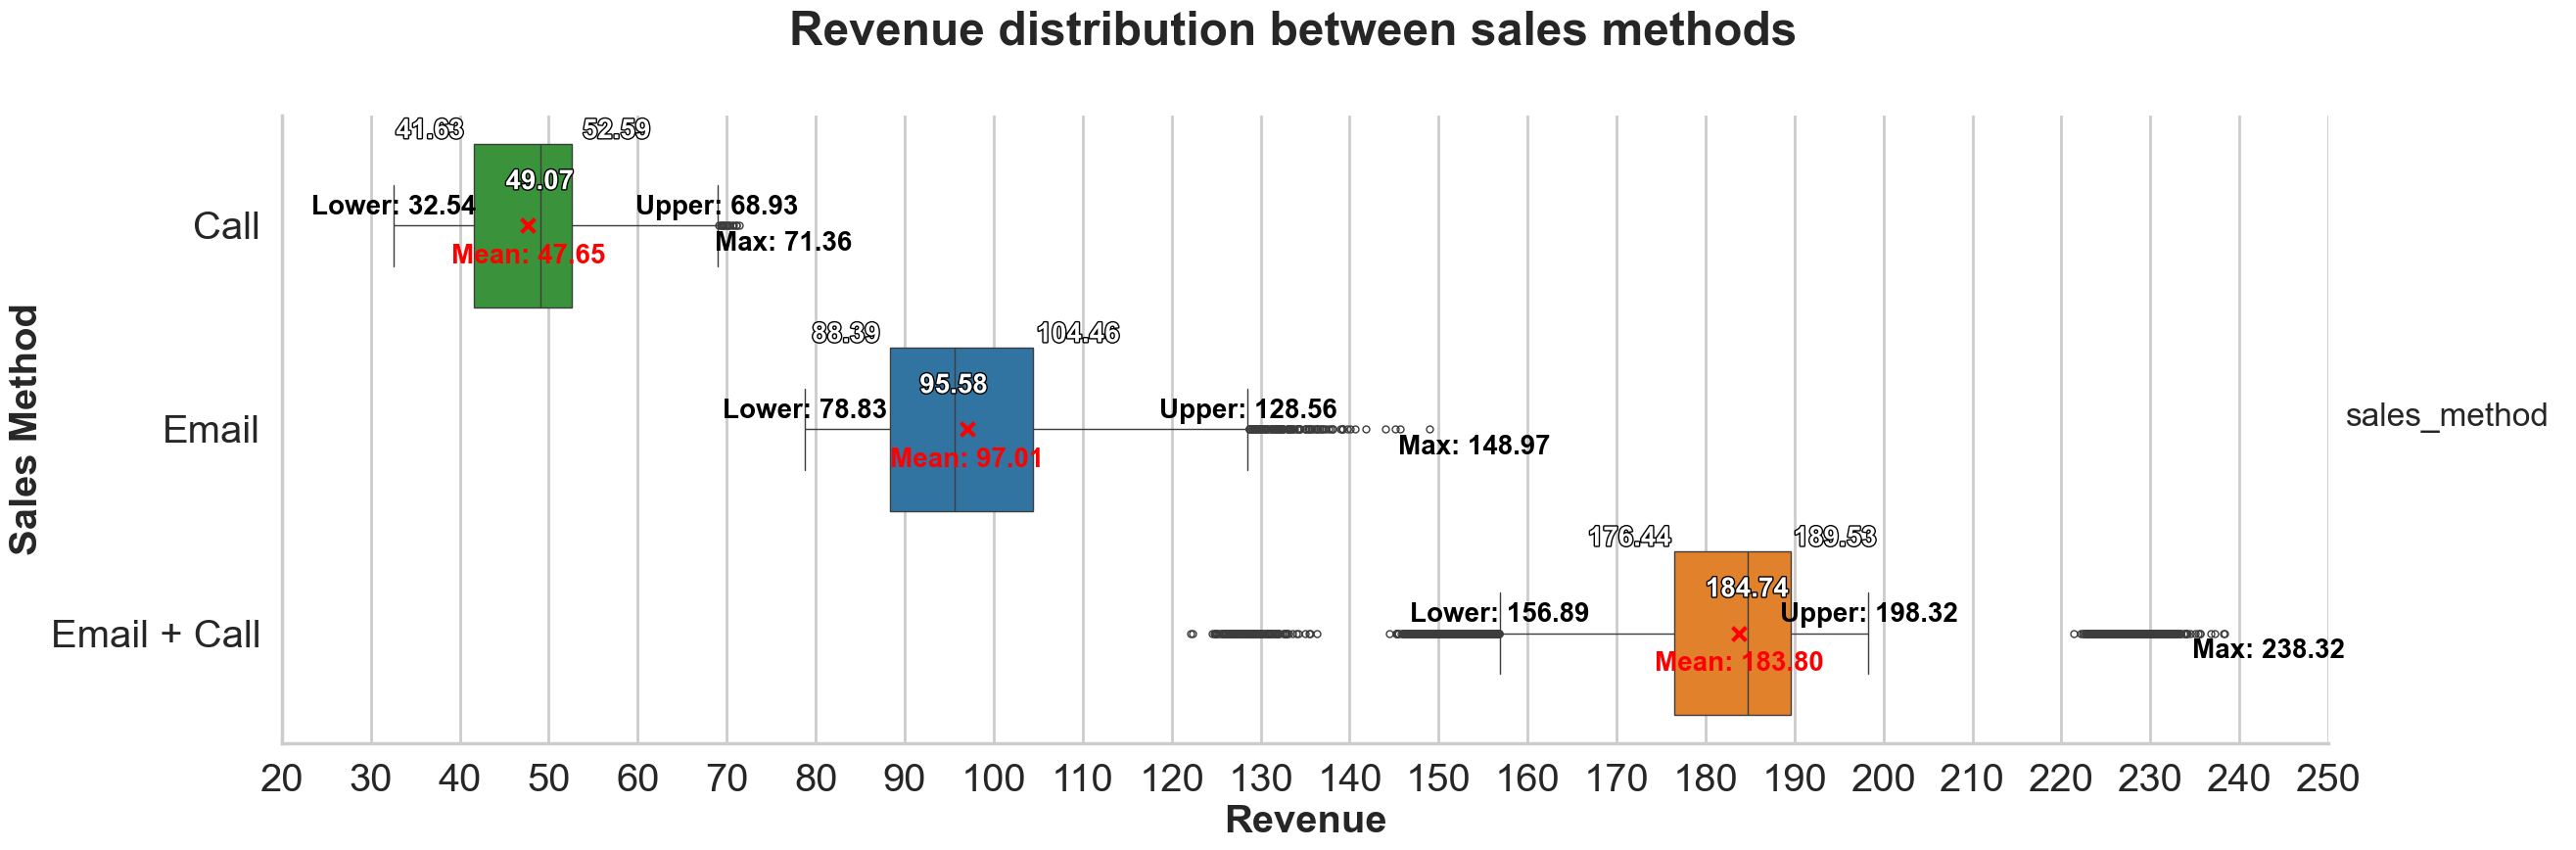

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

sns.set_style('whitegrid')
sns.set_context('poster')
g = sns.catplot(x='revenue', y='sales_method', data=product_sales_imputed, kind='box', height=8, aspect=3, order=['Call', 'Email', 'Email + Call'], hue = 'sales_method')
g.ax.set_xlim(20, 250)
g.ax.set_xlabel('Revenue', fontweight='bold', fontsize='large')
g.ax.set_ylabel('Sales Method', fontweight='bold', fontsize='large')
plt.tick_params(axis='both', which='major', labelsize='large')
g.ax.xaxis.set_major_locator(MaxNLocator(nbins=25))
g.fig.suptitle('Revenue distribution between sales methods', y=1.09, fontweight='bold', fontsize='x-large')

# add the labels
sales_methods = ['Call', 'Email', 'Email + Call']
for i, method in enumerate(sales_methods):
    subdata = product_sales_imputed[product_sales_imputed['sales_method'] == method]['revenue']
    quantiles = subdata.quantile([0.25, 0.5, 0.75])
    Q1 = subdata.quantile(0.25)
    Q3 = subdata.quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    lower_whisker = subdata[subdata >= lower_whisker].min()
    upper_whisker = subdata[subdata <= upper_whisker].max()
    mean_value = subdata.mean()
    quantiles = subdata.quantile([0.25, 0.5, 0.75])
    max_outlier = subdata.max()
    
    plt.scatter(mean_value, i, color='red', marker='x', s=100, zorder=5)
    mean_label = f"Mean: {mean_value:.2f}"

    # whisker values are within the data range
    lower_whisker = max(lower_whisker, subdata.min())
    upper_whisker = min(upper_whisker, subdata.max())

    # annotations for the lower whisker, upper whisker, and mean
    g.ax.text(lower_whisker, i - 0.09, f"Lower: {lower_whisker:.2f}", ha='center', va='center', color='black', fontweight='bold', fontsize='small')
    g.ax.text(mean_value, i + 0.15, f"Mean: {mean_value:.2f}", ha='center', va='center', color='red', fontweight='bold', fontsize='small')
    
    if max_outlier != upper_whisker:
        g.ax.text(upper_whisker, i - 0.09, f"Upper: {upper_whisker:.2f}", ha='center', va='center', color='black', fontweight='bold', fontsize='small')
        g.ax.text(max_outlier + 5, i + 0.09, f"Max: {max_outlier:.2f}", 
         ha='center', va='center', fontweight='bold', color='black', fontsize='small')
    else:
        g.ax.text(upper_whisker, i - 0.09, f"Max: {upper_whisker:.2f}", ha='center', va='center', color='black', fontweight='bold', fontsize='small');
        
    text = g.ax.text(x=quantiles.iloc[0] - 5, y= i - 0.4, s=f"{quantiles.iloc[0]:.2f}", 
             ha='center', va='bottom', fontweight='bold', color='white', fontsize='small')
    text.set_path_effects([patheffects.withStroke(linewidth=2, foreground='black')])
    text = g.ax.text(x=quantiles.iloc[1] - 0.1, y= i - 0.15, s=f"{quantiles.iloc[1]:.2f}", 
             ha='center', va='bottom', fontweight='bold', color='white', fontsize='small')
    text.set_path_effects([patheffects.withStroke(linewidth=2, foreground='black')])
    text = g.ax.text(x=quantiles.iloc[2] + 5, y= i - 0.4, s=f"{quantiles.iloc[2]:.2f}", 
             ha='center', va='bottom', fontweight='bold', color='white', fontsize='small')
    text.set_path_effects([patheffects.withStroke(linewidth=2, foreground='black')])
    

plt.show()

Further **distribution of the number of items sold by each sales method** highlights the **differences in sales volume**, providing clues to the quantity-based preferences of customers depending on the sales approach.

This plot hints that while the **'Call' method has the potential for higher individual sales**, **'Email + Call'** leads to a bigger number of items sold, but **introduces a great variability**. In contrast, the **'Email' method**, while not reaching the high numbers seen in the 'Email + Call' method, **shows steadiness in sales volume**. 

<Figure size 1000x600 with 0 Axes>

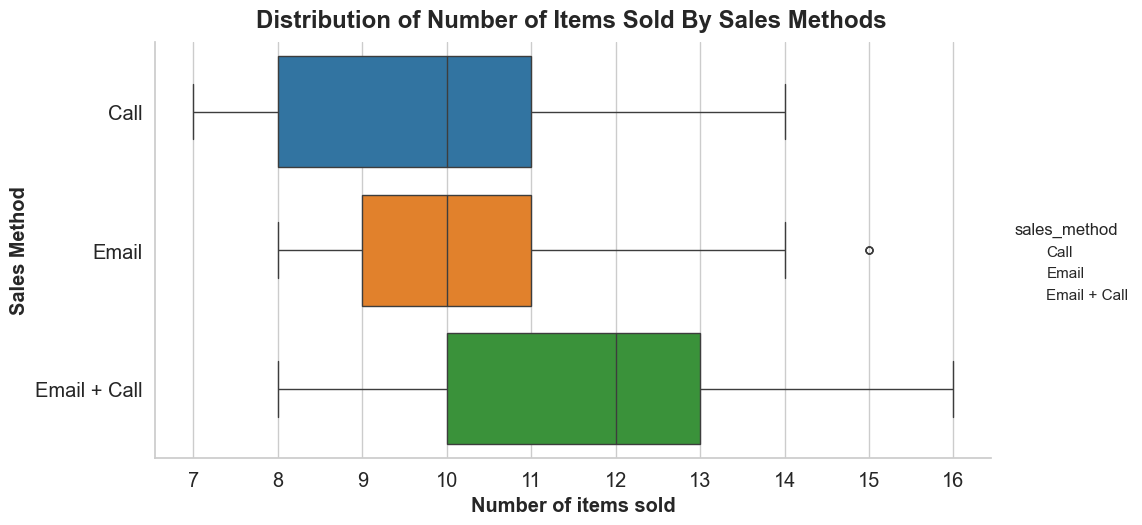

In [31]:
from matplotlib.ticker import MaxNLocator
sns.set_style('whitegrid')
sns.set_context('notebook')
plt.figure(figsize=(10, 6))
g = sns.catplot(x = 'nb_sold', y = 'sales_method', data = product_sales_imputed, kind = 'box', height=5, aspect=2, order = ['Call', 'Email', 'Email + Call'], hue = 'sales_method', hue_order = ['Call', 'Email', 'Email + Call'])
#g.ax.set_xlim(0,250)
g.ax.set_xlabel('Number of items sold', fontweight='bold', fontsize='large')
g.ax.set_ylabel('Sales Method', fontweight='bold', fontsize='large')
plt.tick_params(axis='both', which='major', labelsize='large')
g.ax.xaxis.set_major_locator(MaxNLocator(integer=True))
g.fig.suptitle('Distribution of Number of Items Sold By Sales Methods', y = 1.03, fontweight='bold', fontsize='x-large')
plt.show()

Exploring further, **Average item price distribution between sales methods** plot sheds light on the pricing strategies' impact on sales performance. This visualization might suggest how **customers respond to price points** when **engaged through different sales methods**.

**Calls**: This method has the lowest median price point, indicating that the **items sold through calls tend to be on the more affordable side**.

**Email**: Sales through email have a slightly higher median price than calls, positioned around 10 units on the price scale, which might suggest a **moderate pricing strategy**. The IQR is comparable to that of calls.

**Email + Call**: This combined method shows a substantially higher median price, near the 15-unit mark, suggesting that this dual **approach can command higher prices for items sold**. Although the IQR is similar, indicating consistent pricing strategy, there are notable extreme outliers **indicating that on occasion, this method results in sales with much higher average prices compared to the other methods**.

<Figure size 1000x600 with 0 Axes>

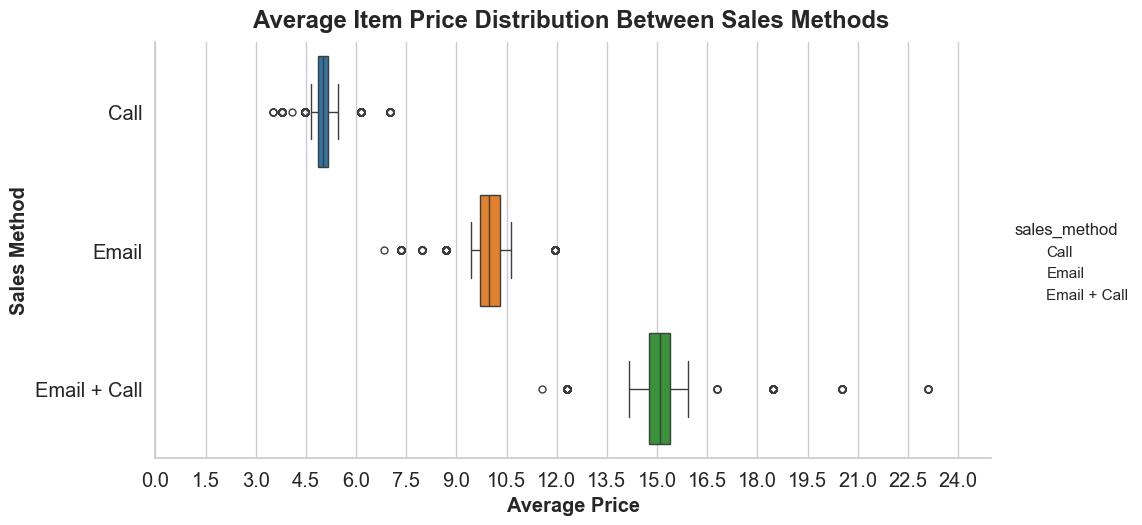

In [32]:
from matplotlib.ticker import MaxNLocator
sns.set_style('whitegrid')
sns.set_context('notebook')
plt.figure(figsize=(10, 6))
g = sns.catplot(x = 'average_price', y = 'sales_method', data = product_sales_imputed, kind = 'box', height=5, aspect=2, order = ['Call', 'Email', 'Email + Call'], hue = 'sales_method', hue_order = ['Call', 'Email', 'Email + Call'])
g.ax.set_xlim(0,25)
g.ax.set_xlabel('Average Price', fontweight='bold', fontsize='large')
g.ax.set_ylabel('Sales Method', fontweight='bold', fontsize='large')
plt.tick_params(axis='both', which='major', labelsize='large')
g.ax.xaxis.set_major_locator(MaxNLocator(nbins='20'))
g.fig.suptitle('Average Item Price Distribution Between Sales Methods', y = 1.03, fontweight='bold', fontsize='x-large')
plt.show()

The histogram showing revenue distribution per sales method underlines a pattern that echoes through the previous findings. We see the multimodal nature of revenue distribution, **indicating the existence of common sales amounts** that resonate across methods.

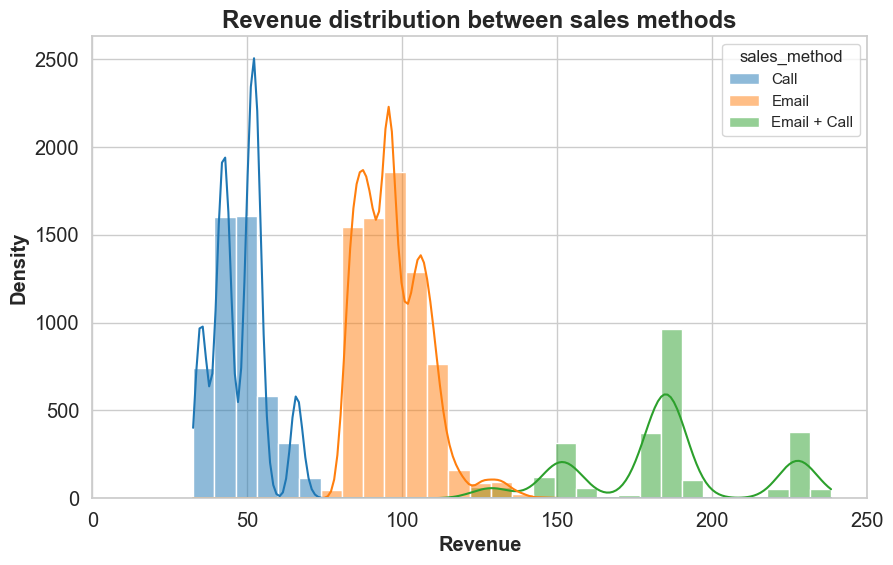

In [33]:
sns.set_style('whitegrid')
sns.set_context('notebook')
plt.figure(figsize=(10, 6))
sns.histplot(data=product_sales_imputed, x = 'revenue', bins=30, kde=True, hue = 'sales_method', hue_order = ['Call', 'Email', 'Email + Call'], label= 'sales_method')
plt.xlabel('Revenue', fontweight='bold', fontsize='large')
plt.ylabel('Density', fontweight='bold', fontsize='large')
plt.title('Revenue distribution between sales methods', fontweight='bold', fontsize='x-large')
plt.xlim(0, 250)
plt.tick_params(axis='both', which='major', labelsize='large')
plt.show()


These multiple layers of analysis converge to suggest a preliminary conclusion that the **sales method** not only **affects** the volume and frequency of sales but also **the pricing strategies' efficacy**. The data suggests that customers might be more responsive to certain sales approaches, which can, in turn, influence the revenue outcome.

A deeper analysis might reveal if these patterns can inform a strategic decision, such as whether to prioritize a particular sales method or tailor pricing strategies to match customer engagement preferences. Therefore, the question I am trying to determine the answer to is:

Do specific sales strategies correlate with various "Customers' Average Spend per Product" Categories (do they draw sales of differently priced items)?

> **Does the distribution of revenue according to sales methods align with the distribution of revenue across different average price categories?**

Considering a **5% significance level**, let’s formulate the null and alternative hypotheses.:

$H_0$ : The distribution of revenue across sales methods is independent of the average price category of the items sold.

_This implies that there is no relationship between sales methods and "Customers' Average Spend per Product" Category, or sales methods do not attract sales of different average priced goods._

$H_A$ : The revenue distribution across sales methods **varies with** the average price category of items sold.

_This suggests that certain sales methods are more effective with Different "Customers' Average Spend per Product" Categories._

To test these hypotheses, we could use a statistical test such as ANOVA if the data is continuous and normally distributed. 

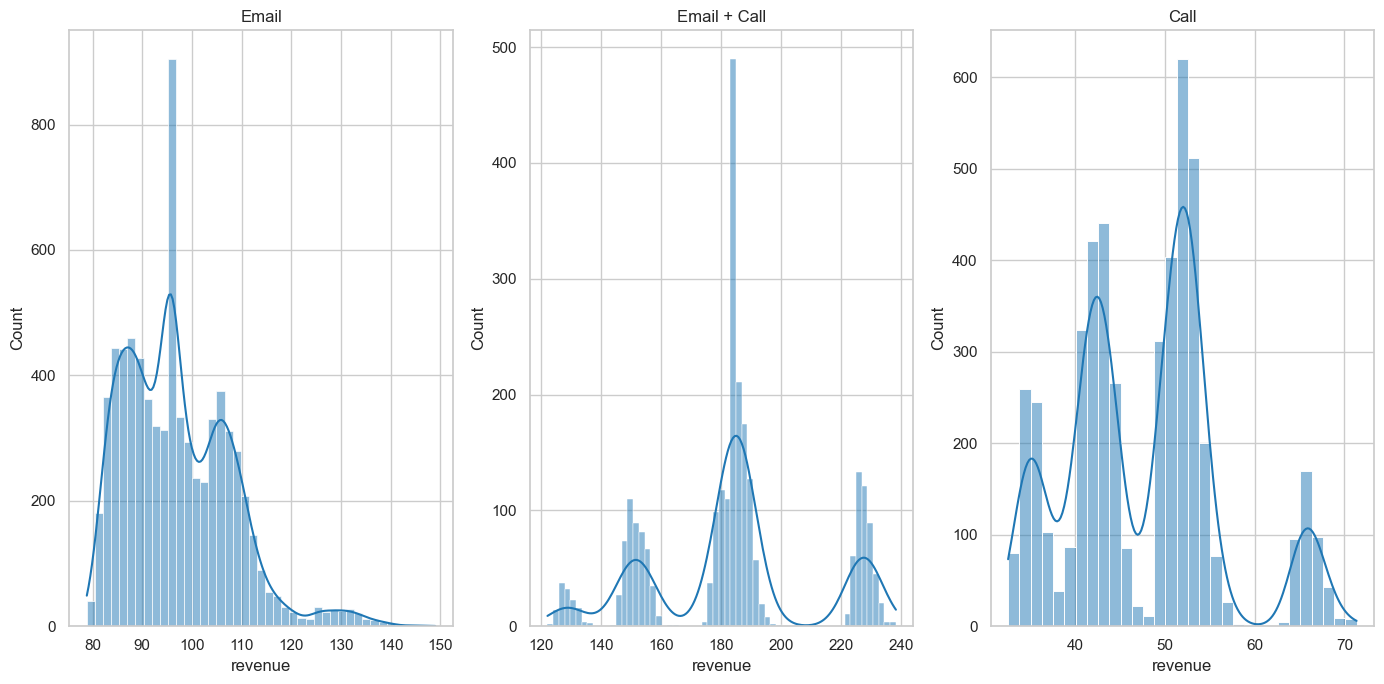

Shapiro-Wilk test for normality results: {'Email': {'Statistic': 0.9203320741653442, 'p-value': 0.0024240328930318356}, 'Email + Call': {'Statistic': 0.8914394378662109, 'p-value': 0.00025363938766531646}, 'Call': {'Statistic': 0.9304942488670349, 'p-value': 0.005769350565969944}}

Levene's Test for equality of variances results: LeveneResult(statistic=1390.058629087539, pvalue=0.0)


In [34]:
from scipy import stats

# Check the distribution of revenue for normality within each sales method
plt.figure(figsize=(14, 7))

for i, method in enumerate(product_sales_imputed['sales_method'].unique()):
    plt.subplot(1, len(product_sales_imputed['sales_method'].unique()), i+1)
    sns.histplot(product_sales_imputed[product_sales_imputed['sales_method'] == method]['revenue'], kde=True)
    plt.title(method)

plt.tight_layout()
plt.show()

# Perform a Shapiro-Wilk test for normality on the revenue for each sales method
normality_results = {}
for method in product_sales_imputed['sales_method'].unique():
    stat, p = stats.shapiro(product_sales_imputed[product_sales_imputed['sales_method'] == method]['revenue'].sample(50, random_state=1))
    normality_results[method] = {'Statistic': stat, 'p-value': p}

print('Shapiro-Wilk test for normality results:', normality_results)
normality_results

# Perform Levene's Test for equality of variances
levene_test = stats.levene(
    product_sales_imputed[product_sales_imputed['sales_method'] == 'Email']['revenue'],
    product_sales_imputed[product_sales_imputed['sales_method'] == 'Call']['revenue'],
    product_sales_imputed[product_sales_imputed['sales_method'] == 'Email + Call']['revenue']
)

print("\nLevene's Test for equality of variances results:", levene_test)

The visual inspection of the revenue distribution within each sales method reveals some skewness. Test for equality of variances across the different sales methods indicates a significant difference in variances, as the p-value is less than 0.05, this implies that the assumption of homogeneity of variances is violated.  Given that both the normality and homogeneity of variance assumptions are violated, it might not be the best option to use the traditional ANOVA for this data.

Instead, we can use the Kruskal-Wallis, which is a non-parametric "version of ANOVA".

In [35]:
# Kruskal-Wallis H-test
kruskal_test = stats.kruskal(
    product_sales_imputed[product_sales_imputed['sales_method'] == 'Email']['revenue'],
    product_sales_imputed[product_sales_imputed['sales_method'] == 'Call']['revenue'],
    product_sales_imputed[product_sales_imputed['sales_method'] == 'Email + Call']['revenue']
)

print("Kruskal-Wallis H-test results:", kruskal_test)

Kruskal-Wallis H-test results: KruskalResult(statistic=12523.25385046208, pvalue=0.0)


The Kruskal-Wallis results show a significant difference in revenue distributions across the different sales methods, with a p-value much less than the 0.05 threshold. This suggests that **at least one sales method's revenue distribution is significantly different from the others.**

Now I will implement the chi-square test of independence, wich is a non-parametric test that compares the observed frequencies of occurrences in each category against the frequencies we would expect to see if the two variables were independent of each other, without making any assumptions about the distribution of the data.

In [36]:
from scipy import stats

contingency_table = pd.crosstab(product_sales_imputed['sales_method'], product_sales_imputed['average_price_category'])

# Performing the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

chi2_results = {'chi2_statistic': chi2, 'p_value': p, 'degrees_of_freedom': dof, 'expected_frequencies': expected}
chi2_results

{'chi2_statistic': 29259.420756127784,
 'p_value': 0.0,
 'degrees_of_freedom': 4,
 'expected_frequencies': array([[1641.7604    , 2500.848     ,  819.3916    ],
        [2470.25053333, 3762.864     , 1232.88546667],
        [ 850.98906667, 1296.288     ,  424.72293333]])}

The heatmap of expected frequencies illustrates the distribution of sales across different Sales Methods and Average Price Categories under the assumption that there's no association between these two variables. 

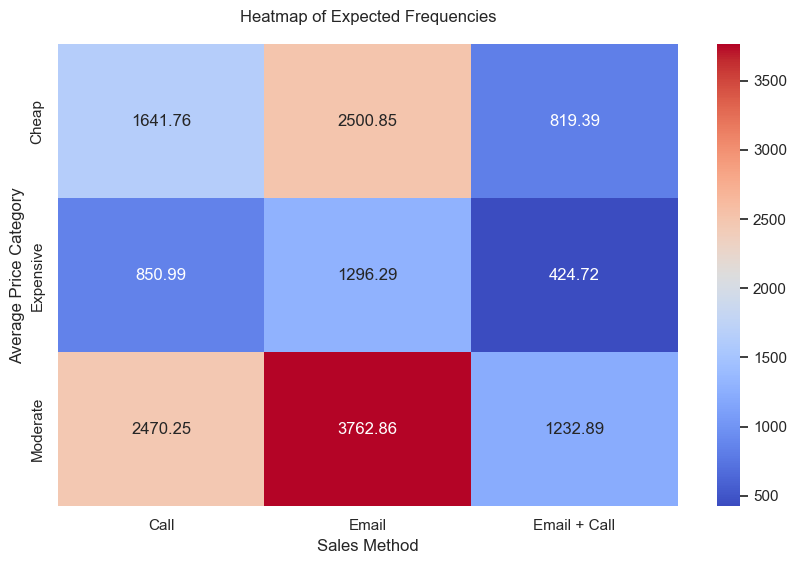

In [37]:
expected_frequencies = pd.DataFrame({
    'Expected Frequencies': [1641.7604, 2500.848, 819.3916, 
                             2470.25053333, 3762.864, 1232.88546667, 
                             850.98906667, 1296.288, 424.72293333],
    'Sales Method': ['Call', 'Email', 'Email + Call'] * 3,
    'Average Price Category': ['Cheap'] * 3 + ['Moderate'] * 3 + ['Expensive'] * 3
}).pivot("Average Price Category", "Sales Method", "Expected Frequencies")

plt.figure(figsize=(10, 6))
sns.heatmap(expected_frequencies, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Heatmap of Expected Frequencies', y = 1.03)
plt.show()

However, the chi-square test of independence results in a chi-squared statistic of approximately 29259.42 and a p-value of 0.0, **indicating that there is a statistically significant association** between the **sales method and the average price category**. In other words, different sales methods seem to attract sales of products at different price points, or vice versa, different average priced goods are associated with different sales approaches.

To understand which specific categories are contributing to the significant chi-square result, we need to examine the adjusted standardized residuals. This method provides a quick way to identify which specific combinations of categories differ significantly from what would be expected under the null hypothesis of independence

In [38]:
# First, we'll calculate the standardized residuals for each cell in the contingency table.
# The standardized residual is (Observed - Expected) / sqrt(Expected)
# A large absolute value of the standardized residual indicates a cell that contributes more to the chi-square statistic.
# Typically, a standardized residual greater than about 2 or less than -2 is considered significant.

standardized_residuals = (contingency_table - expected) / np.sqrt(expected)

# We can now look at these standardized residuals to understand which cells contribute most to the chi-square statistic.
significant_cells = np.abs(standardized_residuals) > 2
significant_residuals = standardized_residuals[significant_cells]

significant_residuals_df = significant_residuals.unstack().reset_index()
significant_residuals_df.columns = ['Average Price Category', 'Sales Method', 'Standardized Residual']
significant_residuals_df

Average Price Category  Sales Method  Standardized Residual
0                  Cheap          Call              81.943505
1                  Cheap         Email             -49.681495
2                  Cheap  Email + Call             -29.171717
3               Moderate          Call             -50.008479
4               Moderate         Email              60.352200
5               Moderate  Email + Call             -33.365404
6              Expensive          Call             -28.625017
7              Expensive         Email             -35.112469
8              Expensive  Email + Call              99.582526

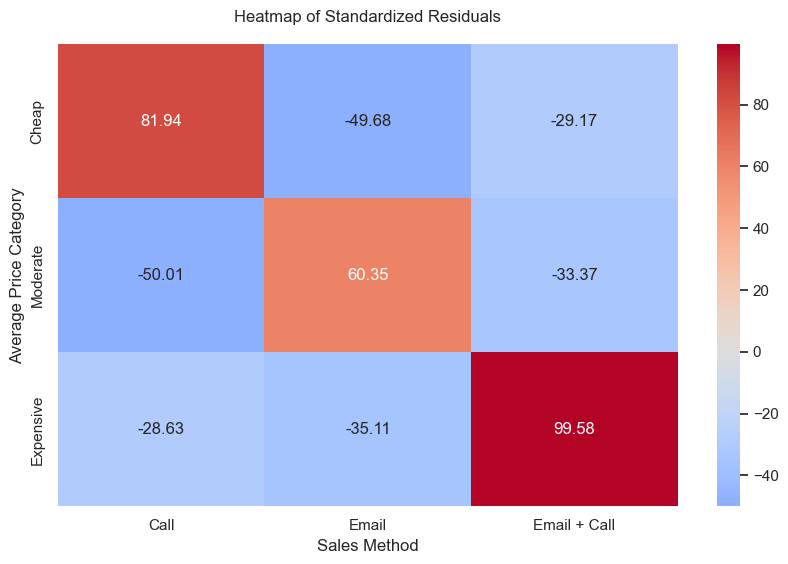

In [39]:
residuals_pivot = significant_residuals_df.pivot("Average Price Category", "Sales Method", "Standardized Residual")
plt.figure(figsize=(10, 6))
sns.heatmap(residuals_pivot, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title('Heatmap of Standardized Residuals', y = 1.03)
plt.show()

The heatmap of standardized residuals visually demonstrates the deviations between observed and expected frequencies for each combination of Average Price Category and Sales Method. Positive values (warmer colors) indicate a higher-than-expected frequency of sales for the combination, whereas negative values (cooler colors) suggest a lower-than-expected frequency.

## Was there any difference in revenue over time for each of the methods?

In [40]:
product_sales_imputed.groupby('sales_method')['revenue'].agg(['sum', 'mean'])

sum        mean
sales_method                       
Call          236445.16   47.651181
Email         724313.35   97.014914
Email + Call  472730.95  183.798970

Based on the analysis of cumulative and average revenue over the first six weeks following the launch of the new product line, we can observe notable differences in the performance of each sales method.

The **'Email'** method shows a consistent and steep increase in revenue over time, suggesting a **strong uptake of the product and an effective sales method**. The **'Email + Call'** method also demonstrates an upward trend but with a **less steep slope compared to 'Email' alone**. Interestingly, the '**Call' method shows the slowest growth in cumulative revenue**, which could suggest that while this **method may build relationships or offer a more personal touch**, it does not generate revenue as quickly as the other methods.

In [41]:
product_sales_imputed = product_sales_imputed.sort_values('week')
product_sales_imputed['cumulative_revenue'] = product_sales_imputed.groupby('sales_method')['revenue'].cumsum()

sns.set_style('whitegrid')
sns.set_context('notebook')
plt.figure(figsize=(10, 6))

sns.lineplot(data=product_sales_imputed, x='week', y='cumulative_revenue', hue='sales_method', hue_order=['Call', 'Email', 'Email + Call'])

plt.xlabel('Week', fontweight='bold', fontsize='large')
plt.ylabel('Cumulative Revenue', fontweight='bold', fontsize='large')
plt.title('Cumulative Revenue over Weeks by Sales Method', fontweight='bold', fontsize='x-large')
plt.tick_params(axis='both', which='major', labelsize='large')
plt.legend(title='Sales Method')
plt.show()

The second graph presents the average weekly revenue per sales method. Here, the 'Email + Call' method displays a **significant growth in average revenue per sale**, particularly in the latter weeks, which could imply that the combination of initial email contact followed by a personal call **may encourage larger purchases** as time progresses, possibly due to building better customer rapport. 

The **'Email'** method shows steady average revenue, indicating **consistent performance**. 

The **'Call'** method has **the lowest average revenue**, which aligns with its slower cumulative revenue growth, suggesting it may not be as effective in generating higher revenue per sale.

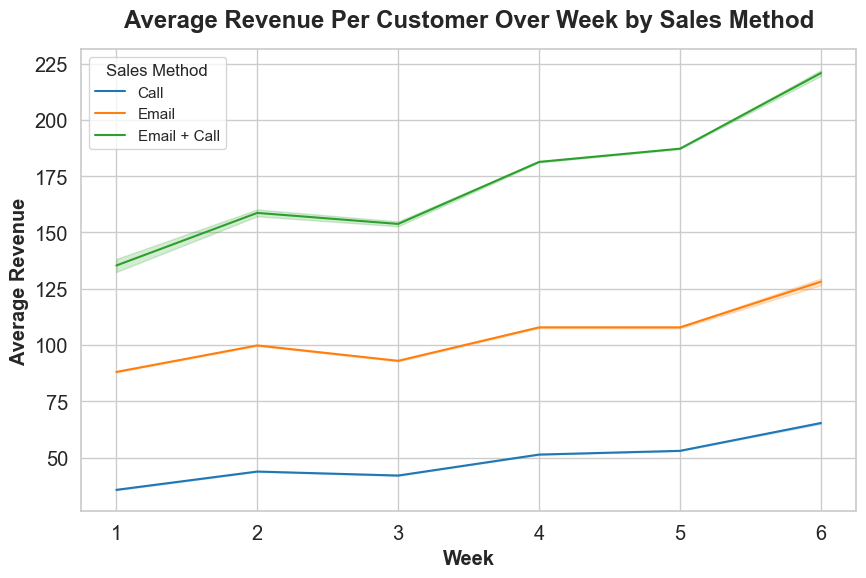

In [42]:
sns.set_style('whitegrid')
sns.set_context('notebook')
plt.figure(figsize=(10, 6))
sns.lineplot(data=product_sales_imputed, x ='week', y='revenue', hue = 'sales_method', hue_order = ['Call', 'Email', 'Email + Call'])
plt.xlabel('Week', fontweight='bold', fontsize='large')
plt.ylabel('Average Revenue', fontweight='bold', fontsize='large')
plt.title('Average Revenue Per Customer Over Week by Sales Method', y = 1.03, fontweight='bold', fontsize='x-large')
plt.tick_params(axis='both', which='major', labelsize='large')
plt.legend(title='Sales Method')
plt.show()

Initially, the **'Email'** sales method accounts for the largest share of revenue, displaying a substantial presence, with a notable increase in the fourth week, potentially correlating with the second email campaign. Despite this peak, **the trend suggests that the 'Email' method's growth in revenue decelerates** towards the fifth and sixth weeks.

On the other hand, the **'Email + Call'** method maintains a steady growth in revenue contribution, overtaking 'Email' in the latter half of the period, specifically from the fourth week onwards. This method appears to gain momentum when the other methods level off, indicating its **effectiveness over time**.

The **'Call'** method, while contributing the least to cumulative revenue, maintains a consistent presence without significant fluctuations.

<Figure size 1000x600 with 0 Axes>

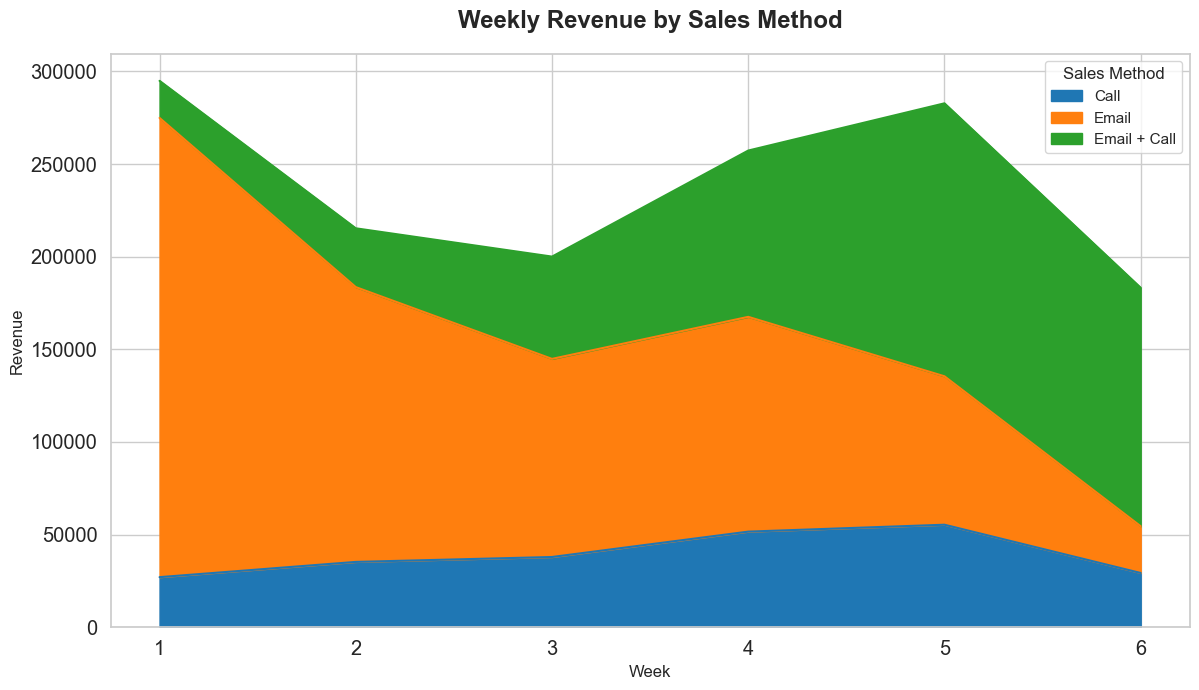

In [43]:
cumulative_revenue_by_week = product_sales_imputed.groupby(['week', 'sales_method'])['revenue'].sum().unstack()

# Plot a stacked area chart
plt.figure(figsize=(10, 6))
sns.set_context('notebook')
cumulative_revenue_by_week.plot(kind='area', stacked=True, figsize=(12, 7))
plt.title('Weekly Revenue by Sales Method', y = 1.03, fontweight='bold', fontsize='x-large')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.legend(title='Sales Method')
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize='large')
plt.show()

Considering the effort required for each method, as described, it's important to note that while the **'Email' method requires the least effort**, it results in the **most significant cumulative revenue**. On the other hand, the **'Email + Call'** method, despite requiring **more effort than email** alone, **shows the potential for increased average revenue per week**, especially in the critical phase when other methods begin to plateau.

The **'Call'** method, requiring the most effort, **shows the least revenue performance** both **cumulatively and on average**, raising questions about its efficiency.

## Based on the data, which method would you recommend we continue to use?
_Some of these methods take more time from the team so they may not be the best for us
to use if the results are similar._

Based on the established hypotheses that different sales methods draw sales to customers that prefere differently priced items, the data reflected in the area chart below:

Particularly for **Expensive price Category** items, the **'Email + Call' method is excelling**. If the **goal is to maximize revenue from high-ticket items**, this method is performing well + **shows the potential for increased average revenue** per week.

In the realm of **moderately priced goods**, the **'Email' approach outperforms others**, however **the trend suggests that the 'Email' method's growth in revenue decelerates** towards the fifth and sixth weeks.

Whereas the 'Call' method, prevails primarily within the **Cheap Price Category** product range.

<Figure size 1200x700 with 0 Axes>

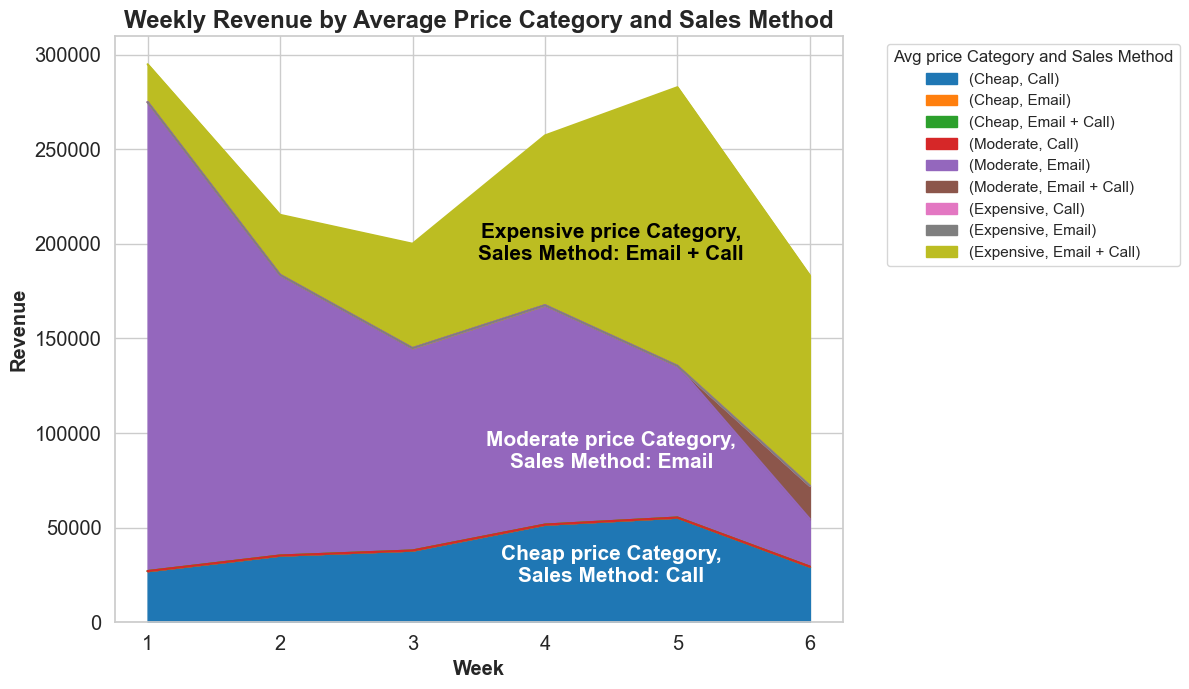

In [44]:
weekly_revenue = product_sales_imputed.groupby(['week', 'average_price_category', 'sales_method'])['revenue'].sum()
pivot_data = weekly_revenue.unstack(level=['average_price_category', 'sales_method']).fillna(0)

plt.figure(figsize=(12, 7))
sns.set_context('notebook')
pivot_data.plot(kind='area', stacked=True, figsize=(12, 7))
plt.title('Weekly Revenue by Average Price Category and Sales Method', fontweight='bold', fontsize='x-large')
plt.xlabel('Week', fontweight='bold', fontsize='large')
plt.ylabel('Revenue', fontweight='bold', fontsize='large')
plt.legend(title='Avg price Category and Sales Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.text(4.5, 200000, 'Expensive price Category,\nSales Method: Email + Call', verticalalignment='center', horizontalalignment='center', fontsize=15, color='black', fontweight='bold')
plt.text(4.5, 90000, 'Moderate price Category,\nSales Method: Email', verticalalignment='center', horizontalalignment='center', fontsize=15, color='white', fontweight='bold')
plt.text(4.5, 30000, 'Cheap price Category,\nSales Method: Call', verticalalignment='center', horizontalalignment='center', fontsize=15, color='white', fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize='large')
plt.show()

The **'Email'** method contributes to **more than half of the total revenue**, which is a significant share. Considering its low time investment, this method offers **the best revenue-to-effort ratio** during the past 6 weeks period. Meanwhile, the **'Email + Call'** method that tops the expensive price segment secures **upwards of 30% of the total revenue**, with the **'Call'** method, which reigns within the lower-priced category, **contributing 16.5%**.

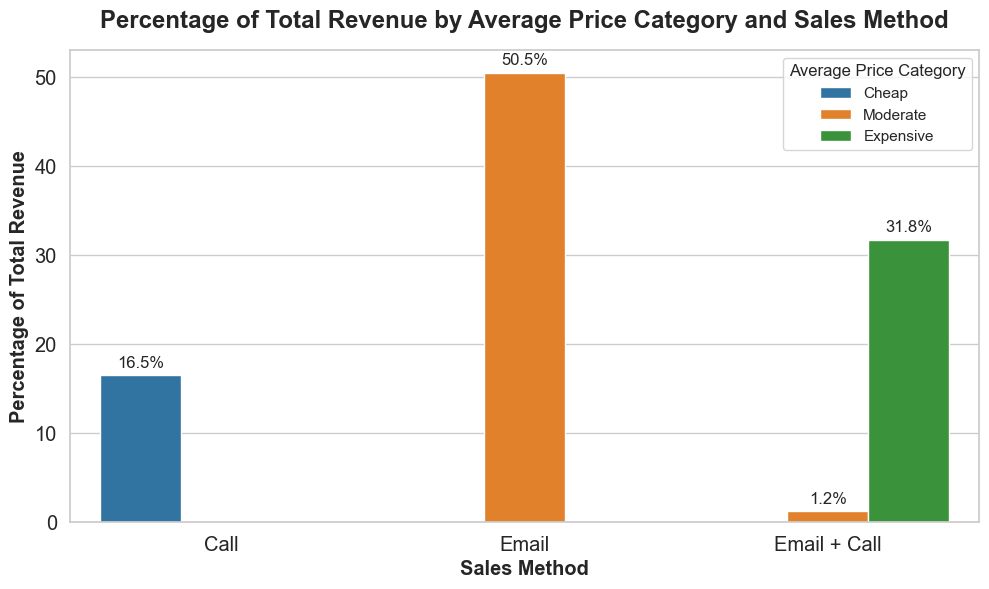

In [45]:
total_revenue = product_sales_imputed.groupby(['average_price_category', 'sales_method'])['revenue'].sum()

total_revenue_percentage = total_revenue / total_revenue.sum() * 100
total_revenue_df = total_revenue_percentage.reset_index()
total_revenue_df.columns = ['Average Price Category', 'Sales Method', 'Percentage of Total Revenue']

# Creaing the bar plot
plt.figure(figsize=(10, 6))
sns.set_context('notebook')
ax = sns.barplot(
    data=total_revenue_df,
    x='Sales Method',
    y='Percentage of Total Revenue',
    hue='Average Price Category'
)

# Adding the text annotations on top of the bars
for p in ax.patches:
    if p.get_height() > 0.01:
        ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Percentage of Total Revenue by Average Price Category and Sales Method', y = 1.03, fontweight='bold', fontsize='x-large')
plt.xlabel('Sales Method', fontweight='bold', fontsize='large')
plt.ylabel('Percentage of Total Revenue', fontweight='bold', fontsize='large')
plt.legend(title='Average Price Category')
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize='large')
plt.show()

<AxesSubplot: xlabel='week', ylabel='count'>

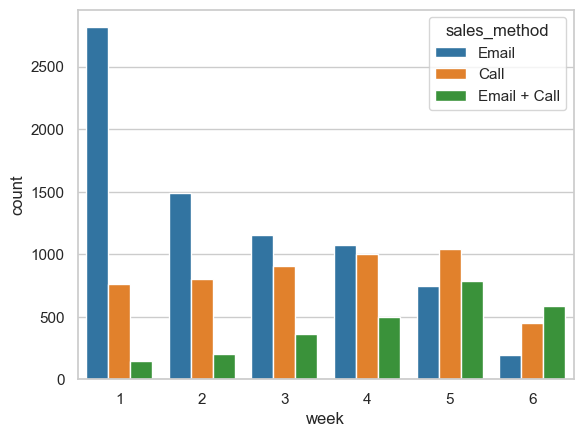

In [46]:
sns.set_context('notebook')
sns.countplot(x='week', data=product_sales_imputed, hue='sales_method')

To make our conclusions even more justified, let's assess the **ratio of effort to efficiency**, that can be further also used as a business metric to asses the sales methods efficiency during further weeks from the product deployment.

We know following information regarding the three different sales strategies:
- **Email**: Include sending 2 emails & require very little work for the team.
- **Call**: Include 1 call ~ thirty minutes per customer.
- **Email and call**: Include sending 1 email + 1 call ~ ten minutes per customer.

The code below calculates the time efficiency of sales methods. It assigns 30 minutes for calls, a combination of email time plus 10 minutes of calling time for 'Email + Call', and twice the average email time for pure emails,**ensuring a minimum of 1 minute to prevent excessively high revenue per minute calculations** for any method taking less than a minute per customer. Then it evaluates revenue generated per minute spent on each sale.

I've estimated that **it takes approximately 60 minutes to configure CRM emails for a mass delivery session**. If this estimate doesn't match your experience, please **feel free to modify the variable below** to a more accurate number. Once you've made any necessary adjustments, **simply execute the 'Run All' command** to update the subsequent graphs with the new data.

Nevertheless, because the algorithm calculates the average time spent on emails by dividing the total time dedicated to email outreach by the number of customers who were reached through "Email Only" and "Email + Call" methods, **the resulting average time per customer email will be less than a minute**, until the total time invested in sending emails exceeds the number of customers who converted through these methods in minutes.

In [47]:
time_spent_on_sending_emails = 60

In [48]:
email_min_per_customer = time_spent_on_sending_emails / len(product_sales_imputed[product_sales_imputed['sales_method'].isin(['Email', 'Email + Call'])])

def minutes_per_sale(sales_method):
    if sales_method == 'Call':
        return 30 # 30 minutes for Call per customer
    elif sales_method == 'Email + Call':
        return email_min_per_customer + 10 # 10 minutes for Call per customer + email_min_per_customer
    elif sales_method == 'Email':
        # Using double the average email time for emails, with a minimum of 1 minute
        return max(email_min_per_customer * 2, 1)
    else:
        return None  # For any unexpected sales method

product_sales_imputed['minutes_per_sale'] = product_sales_imputed['sales_method'].apply(minutes_per_sale)

product_sales_imputed['revenue_per_minute_spent'] = product_sales_imputed['revenue']/product_sales_imputed['minutes_per_sale']

In [49]:
product_sales_imputed['revenue_per_minute_spent'].describe()

count    15000.000000
mean        51.962647
std         45.854900
min          1.084667
25%          1.755000
50%         23.196635
75%         95.580000
max        148.970000
Name: revenue_per_minute_spent, dtype: float64

After plotting the weekly revenue in relation to the time spent on sales by average price category and sales method, it's clear that the **efficiency of the sales methods can be quantitatively analyzed**. 

The area graph showcases **how revenue stacks up** when **accounting for the time invested across various pricing tiers and methods**. 

In particular, the **'Email'** method stands out for its significant share of '**revenue per time invested**' within **the moderate price category**, highlighting its efficiency.

<Figure size 1200x700 with 0 Axes>

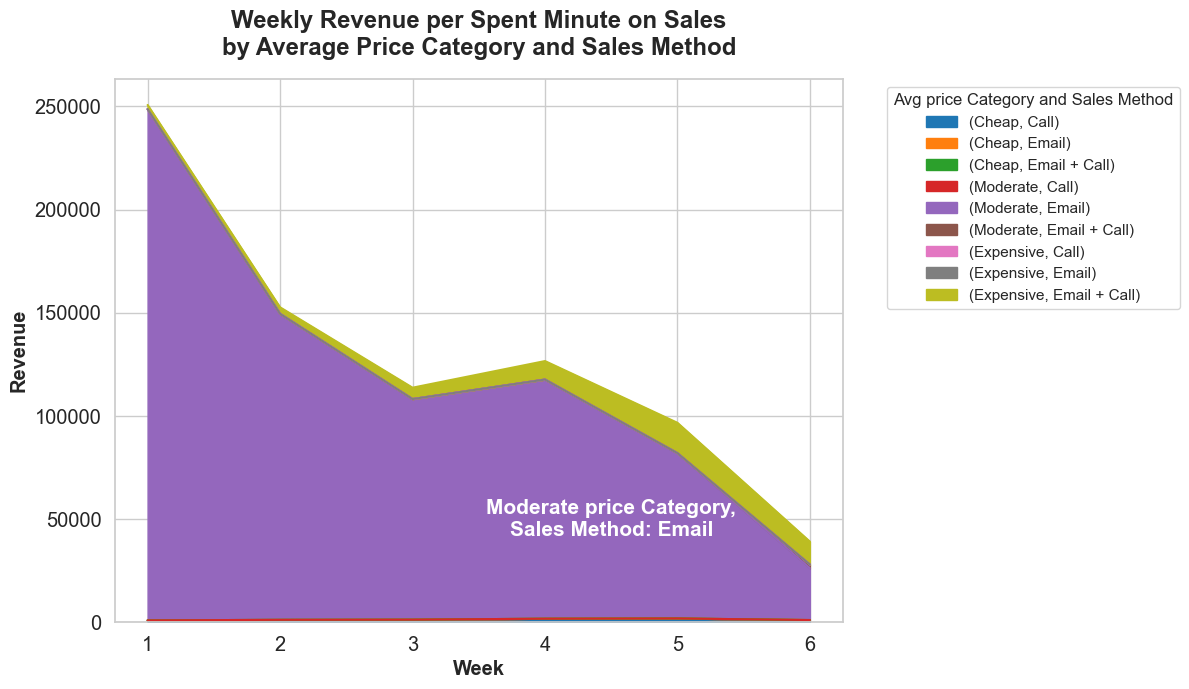

In [50]:
weekly_revenue = product_sales_imputed.groupby(['week', 'average_price_category', 'sales_method'])['revenue_per_minute_spent'].sum()
pivot_data = weekly_revenue.unstack(level=['average_price_category', 'sales_method']).fillna(0)

plt.figure(figsize=(12, 7))
sns.set_context('notebook')
pivot_data.plot(kind='area', stacked=True, figsize=(12, 7))
plt.title('Weekly Revenue per Spent Minute on Sales\nby Average Price Category and Sales Method', y = 1.03, fontweight='bold', fontsize='x-large')
plt.xlabel('Week', fontweight='bold', fontsize='large')
plt.ylabel('Revenue', fontweight='bold', fontsize='large')
plt.legend(title='Avg price Category and Sales Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.text(4.5, 50000, 'Moderate price Category,\nSales Method: Email', verticalalignment='center', horizontalalignment='center', fontsize=15, color='white', fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize='large')
plt.show()

In light of these findings, it would be prudent to **prioritize the 'Email'** method for its superior performance **in generating both total and average revenue with minimal time investment**. Nevertheless, the **'Email + Call'** method's effectiveness in engaging customers for high-value purchases shouldn't be overlooked, suggesting a strategic **use of this approach for premium sales.**

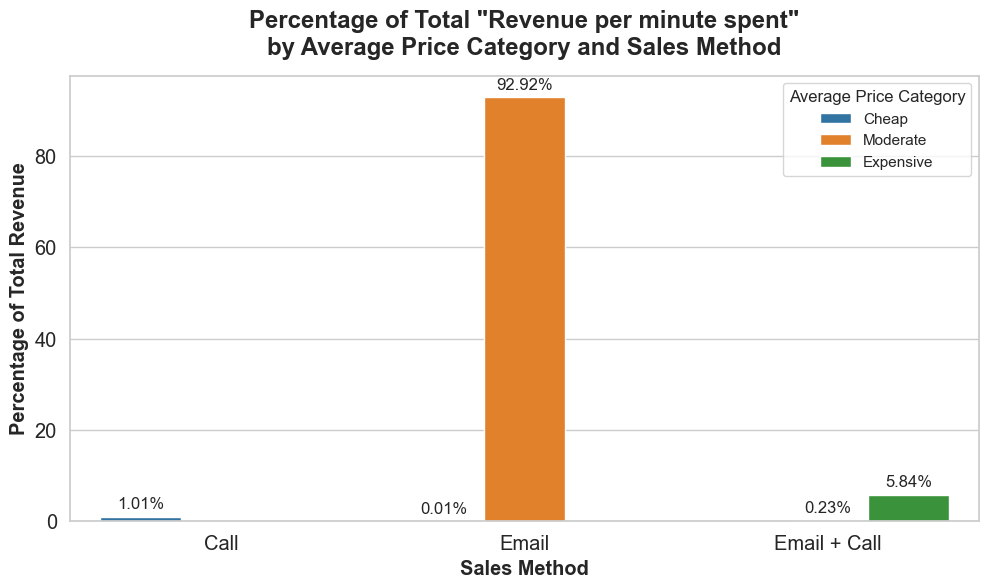

In [51]:
total_revenue = product_sales_imputed.groupby(['average_price_category', 'sales_method'])['revenue_per_minute_spent'].sum()

total_revenue_percentage = total_revenue / total_revenue.sum() * 100
total_revenue_df = total_revenue_percentage.reset_index()
total_revenue_df.columns = ['Average Price Category', 'Sales Method', 'Percentage of Total Revenue']

# Creaing the bar plot
plt.figure(figsize=(10, 6))
sns.set_context('notebook')
ax = sns.barplot(
    data=total_revenue_df,
    x='Sales Method',
    y='Percentage of Total Revenue',
    hue='Average Price Category'
)

# Adding the text annotations on top of the bars
for p in ax.patches:
    if p.get_height() > 0.01:
        ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Percentage of Total "Revenue per minute spent"\nby Average Price Category and Sales Method', y = 1.03, fontweight='bold', fontsize='x-large')
plt.xlabel('Sales Method', fontweight='bold', fontsize='large')
plt.ylabel('Percentage of Total Revenue', fontweight='bold', fontsize='large')
plt.legend(title='Average Price Category')
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize='large')
plt.show()

Based on the data and these insights, **I recommend focusing on the 'Email' sales method** due to its strong overall performance in both total and average revenue, with the least amount of time required from the team. However, **for sales of expensive items where the customer may benefit from a more personal touch, the 'Email + Call' method has proven effective** and could be used selectively for high-value or complex sales that justify the additional time investment. The 'Call' method, while valuable for customer relationship building, may not be the best primary strategy due to its lower revenue generation and higher time cost.

## Definition of a metric for the business to monitor

## Sales Performance Index (SPI)

**How should the business monitor what they want to achieve?**

The SPI will be a comprehensive metric derived from three core components, each representing a dimension of the sales process: **weekly revenue trends**, **cumulative revenue impact**, and **revenue efficiency based on time spent**.

- **Weekly Revenue Growth Rate (WRGR)**: Measures the short-term agility and responsiveness of a sales method by calculating the week-over-week percentage change in revenue. A higher WRGR indicates a method's success in quickly increasing sales revenue over time.

- **Cumulative Sales Efficiency (CSE)**: This measures the long-term strategic value, evaluating the total revenue accrued over a period, indicating sustainability and endurance of sales methods.

- **Revenue per Time Unit (RPTU)**: Assesses the operational efficiency of a sales method by comparing the revenue generated to the time invested in sales activities. It provides insight into how efficiently resources are being used to generate revenue.

## Calculation Process
The SPI calculation process involves several key steps:

- Data Preparation: After ensuring data cleanliness and consistency, we group the data by sales method and average price category to analyze performance across different segments.

**Estimate the initial value(s) for the metric based on the current data:**

- The WRGR is calculated as the week-over-week percentage change in revenue for each sales method. The values for each method across the weeks are as follows (NaN represents the first week, where a percentage change cannot be calculated):

In [52]:
# Calculating Weekly Revenue Growth Rate (WRGR)
# Group by week and sales method to calculate weekly revenue
weekly_revenue = product_sales_imputed.groupby(['week', 'sales_method'])['revenue'].sum().unstack()

# Calculate WRGR as week-over-week percentage change
wrgr = round(weekly_revenue.pct_change() * 100, 2)

# Calculating Cumulative Sales Efficiency (CSE)
# Since 'cumulative_revenue' accumulate within transactions, we'll take the last value for each method
# after sorting to get the final cumulative revenue for each method.
final_cumulative_revenue = product_sales_imputed.sort_values(by=['week', 'sales_method']).groupby('sales_method').last()['cumulative_revenue']

# Calculating Revenue per Time Unit (RPTU)
# Summing total revenue and total minutes spent by sales method to calculate RPTU as revenue per minute
total_revenue_and_minutes = product_sales_imputed.groupby(['sales_method', 'average_price_category']).agg({'revenue':'sum', 'minutes_per_sale':'sum'})
rptu = total_revenue_and_minutes['revenue'] / total_revenue_and_minutes['minutes_per_sale']

weekly_revenue_df = weekly_revenue.reset_index()
wrgr_df = wrgr.reset_index()
cse_df = final_cumulative_revenue.reset_index()
cse_df.columns = ['sales_method', 'cumulative_revenue']
rptu_df = rptu.reset_index()
rptu_df.columns = ['sales_method', 'average_price_category', 'revenue_per_minute']

wrgr_df

sales_method  week   Call  Email  Email + Call
0                1    NaN    NaN           NaN
1                2  30.40 -40.16         58.46
2                3   7.52 -27.91         73.96
3                4  36.11   8.41         62.58
4                5   7.22 -30.89         64.14
5                6 -47.08 -68.50        -12.64

- Determine CSE by adding up the total revenue for each sales method over the six weeks. If the 'Call' method generated $1,000,000 over six weeks and 'Email' generated 1,500,000, the CSE for 'Email' is 1.5 times that of 'Call'.

In [53]:
cse_df

sales_method  cumulative_revenue
0          Call           236445.16
1         Email           724313.35
2  Email + Call           472730.95

- Compute RPTU by dividing the weekly revenue by the time spent on sales activities, adjusted for each price category. If 'Email' for the moderate price category generated 200,000 in a week with a total of 100 hours spent on sales activities, the RPTU would be $2,000 per hour.

In [54]:
rptu_df

sales_method average_price_category  revenue_per_minute
0          Call                  Cheap            1.588373
1          Call               Moderate                 NaN
2          Call              Expensive                 NaN
3         Email                  Cheap           95.580000
4         Email               Moderate           97.015106
5         Email              Expensive                 NaN
6  Email + Call                  Cheap                 NaN
7  Email + Call               Moderate           18.462964
8  Email + Call              Expensive           18.365310

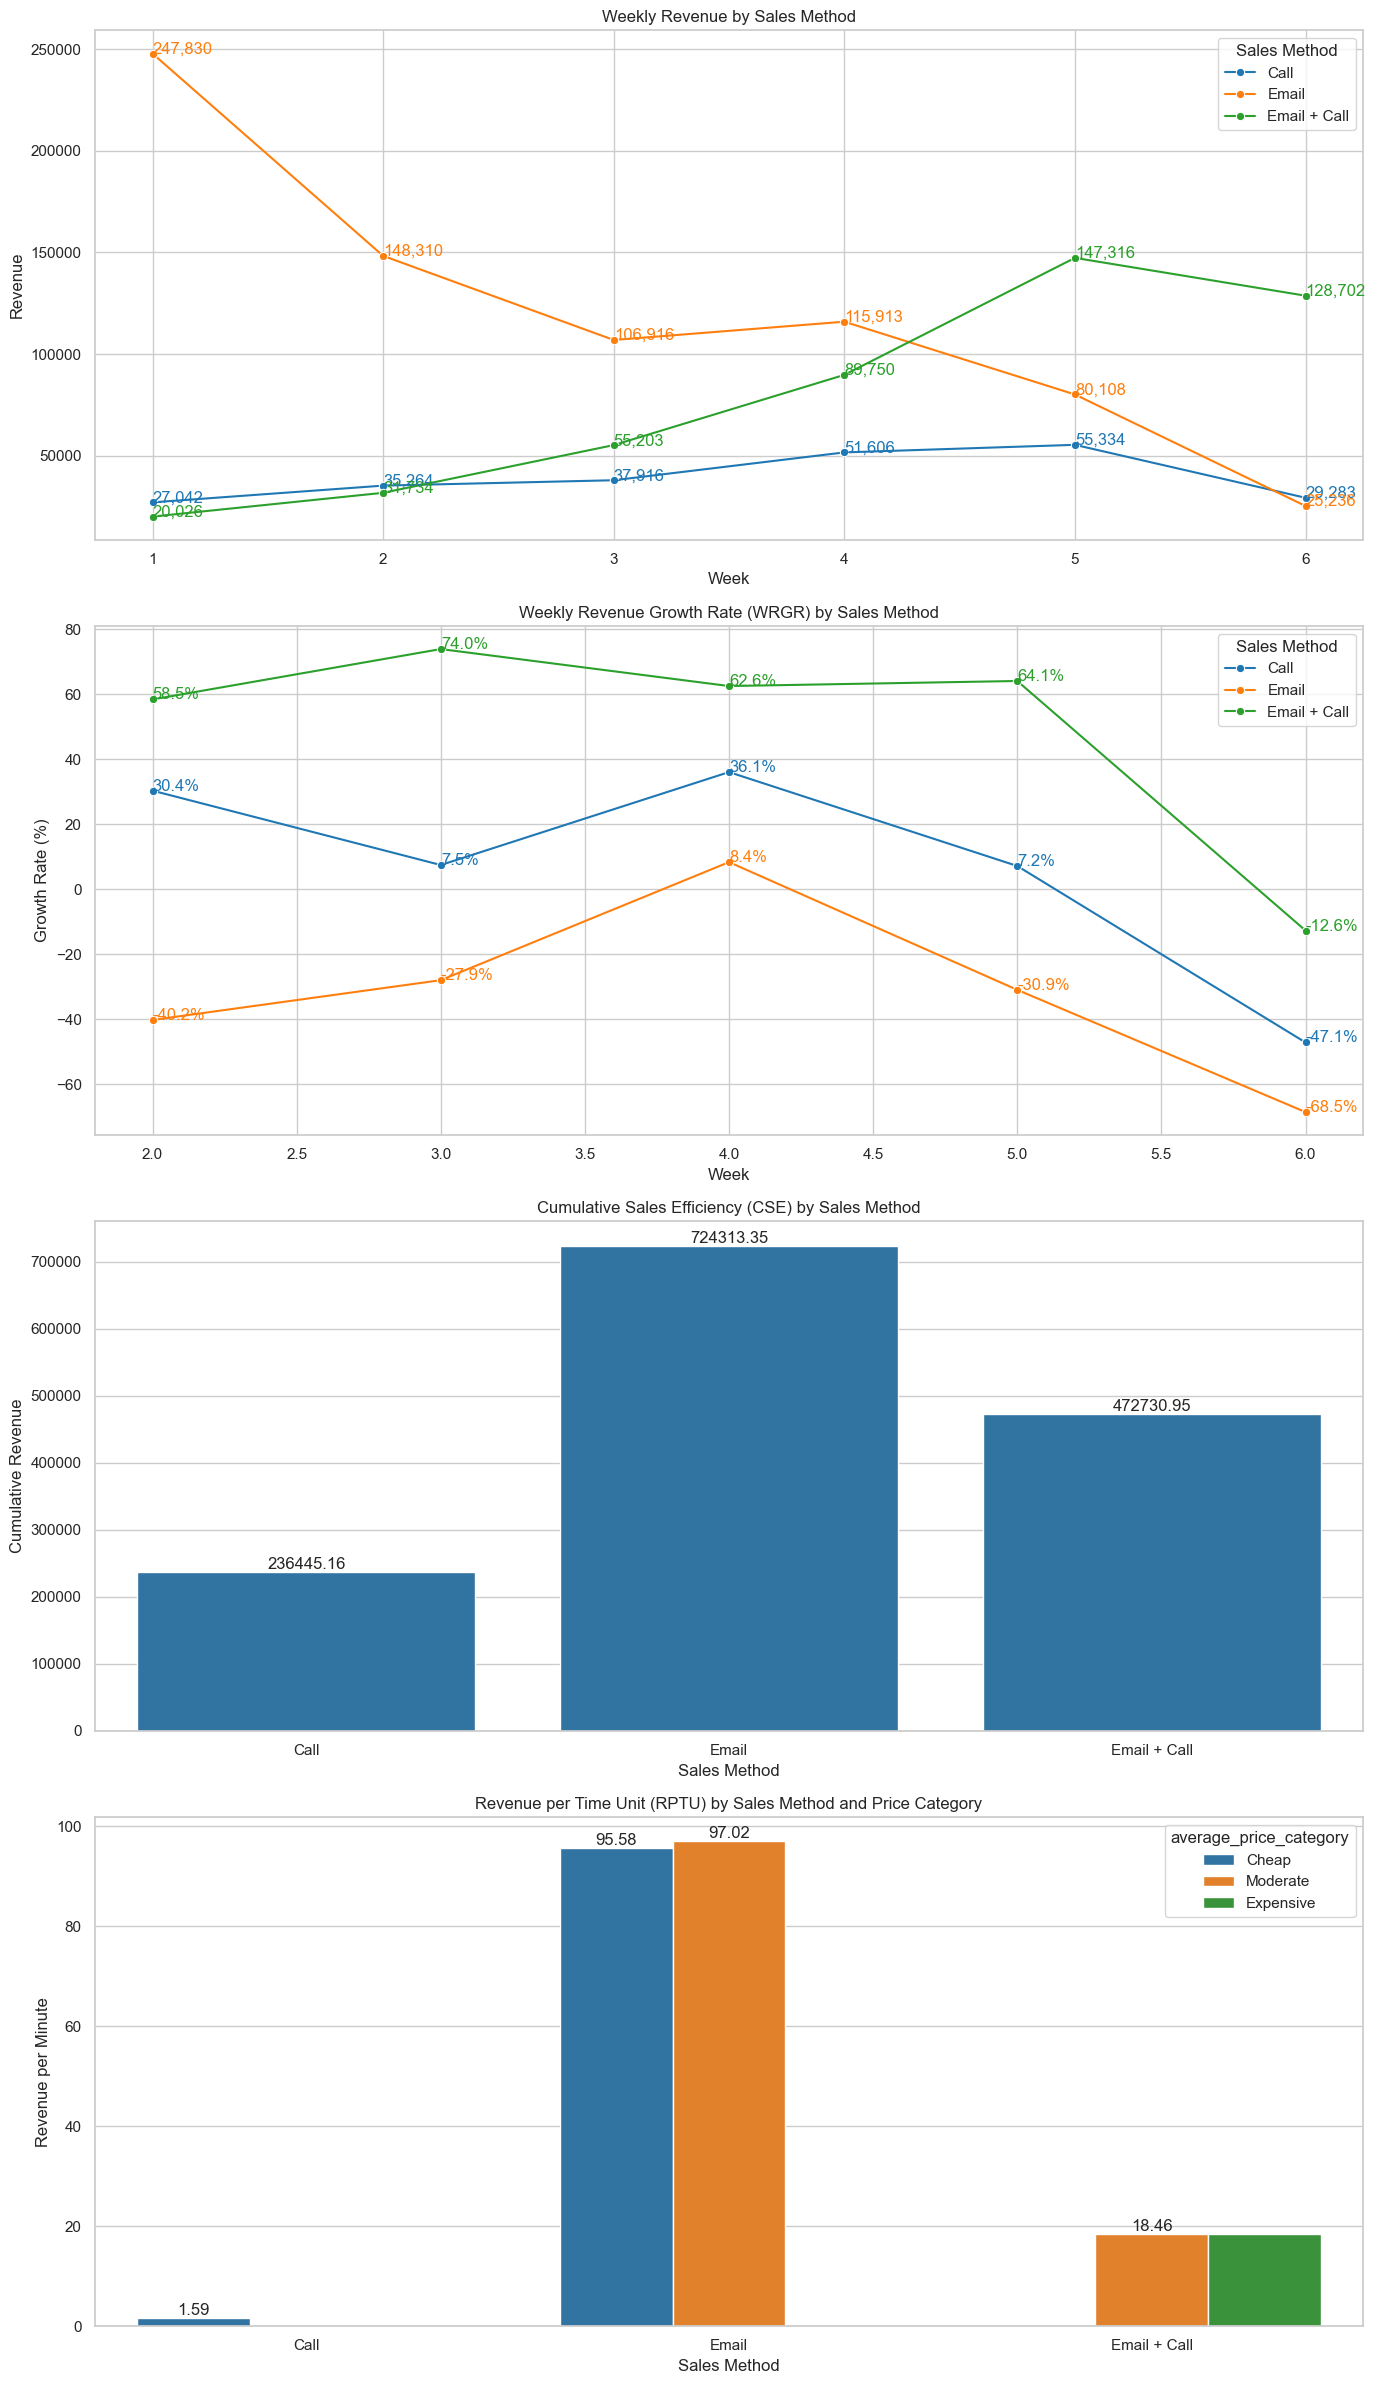

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

data = product_sales_imputed
# Set up the matplotlib figure
fig, axs = plt.subplots(4, 1, figsize=(14, 24))

# Plot for Weekly Revenue
sns.lineplot(data=weekly_revenue_df.melt(id_vars=['week'], var_name='Sales Method', value_name='Revenue'),
             x='week', y='Revenue', hue='Sales Method', marker='o', ax=axs[0])
axs[0].set_title('Weekly Revenue by Sales Method')
axs[0].set_xlabel('Week')
axs[0].set_ylabel('Revenue')
for i, line in enumerate(axs[0].get_lines()):
    line.set_marker("o")
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        axs[0].text(x, y, f'{y:,.0f}', color=line.get_color())

# Plot for WRGR
sns.lineplot(data=wrgr_df.melt(id_vars=['week'], var_name='Sales Method', value_name='WRGR'),
             x='week', y='WRGR', hue='Sales Method', marker='o', ax=axs[1])
axs[1].set_title('Weekly Revenue Growth Rate (WRGR) by Sales Method')
axs[1].set_xlabel('Week')
axs[1].set_ylabel('Growth Rate (%)')
for i, line in enumerate(axs[1].get_lines()):
    line.set_marker("o")
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        axs[1].text(x, y, f'{y:,.1f}%', color=line.get_color())

# Bar plot for CSE
sns.barplot(data=cse_df, x='sales_method', y='cumulative_revenue', ax=axs[2])
axs[2].set_title('Cumulative Sales Efficiency (CSE) by Sales Method')
axs[2].set_xlabel('Sales Method')
axs[2].set_ylabel('Cumulative Revenue')
axs[2].bar_label(axs[2].containers[0], fmt='%.2f')

# Bar plot for RPTU
sns.barplot(data=rptu_df, x='sales_method', y='revenue_per_minute', hue='average_price_category', ax=axs[3])
axs[3].set_title('Revenue per Time Unit (RPTU) by Sales Method and Price Category')
axs[3].set_xlabel('Sales Method')
axs[3].set_ylabel('Revenue per Minute')
axs[3].bar_label(axs[3].containers[0], fmt='%.2f')
axs[3].bar_label(axs[3].containers[1], fmt='%.2f')

plt.tight_layout()
plt.show()


**Applying the SPI:**

For calculating the Sales Performance Index (SPI), we focus on **the average WRGR over the last three weeks** for each combination of sales method and average price category. This approach aims to provide a more stable measure of short-term sales performance, reflecting recent trends while smoothing out any single-week anomalies or fluctuations.

- **Normalization**: To ensure a fair comparison across different metrics, we normalize WRGR, CSE, and RPTU using a StandardScaler, which adjusts each metric to have a mean of zero and a standard deviation of one.
- **SPI Calculation**: We average the normalized values of 3 weeks WRGR average, CSE, and RPTU for each sales method and price category combination to derive the SPI. This composite index provides a holistic view of sales performance, balancing short-term growth, long-term revenue generation, and operational efficiency.

In [56]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

weekly_revenue = data.pivot_table(values='revenue', index=['week', 'average_price_category'], columns='sales_method', aggfunc='sum').fillna(0)
wrgr = weekly_revenue.groupby('average_price_category').pct_change().fillna(0)

# Calculate WRGR: sort, then calculate pct_change for each sales method and price category
weekly_revenue_by_category = data.groupby(['week', 'sales_method', 'average_price_category'])['revenue'].sum().reset_index()
weekly_revenue_by_category.sort_values(by=['sales_method', 'average_price_category', 'week'], inplace=True)
weekly_revenue_by_category['WRGR'] = weekly_revenue_by_category.groupby(['sales_method', 'average_price_category'])['revenue'].pct_change().fillna(0)


# Filter for the last 3 weeks to calculate the average WRGR for the last 3 weeks for each sales method and category
max_week = weekly_revenue_by_category['week'].max()
wrgr_last3 = weekly_revenue_by_category[weekly_revenue_by_category['week'] > max_week - 3]
wrgr_mean = wrgr_last3.groupby(['sales_method', 'average_price_category'])['WRGR'].mean().reset_index()

# Calculate Cumulative Sales Efficiency (CSE) for each sales method and price category
cse = data.groupby(['sales_method', 'average_price_category'])['revenue'].sum()

# Calculate Revenue per Time Unit (RPTU) for each sales method and price category
rptu = data.groupby(['sales_method', 'average_price_category']).apply(lambda x: x['revenue'].sum() / x['minutes_per_sale'].sum())

# Normalize the metrics using StandardScaler
scaler = StandardScaler()
wrgr_normalized = wrgr.copy()
cse_normalized = scaler.fit_transform(cse.values.reshape(-1, 1))
rptu_normalized = scaler.fit_transform(rptu.values.reshape(-1, 1))

# Update the normalized values back to their respective dataframes
cse_normalized_df = pd.DataFrame(cse_normalized, index=cse.index, columns=['CSE_normalized'])
rptu_normalized_df = pd.DataFrame(rptu_normalized, index=rptu.index, columns=['RPTU_normalized'])

# Combine all metrics into a single DataFrame for SPI calculation
spi_components = cse_normalized_df.join(rptu_normalized_df, how='outer').join(wrgr_mean.groupby('average_price_category').mean(), how='outer').fillna(0)

# Calculate SPI as the mean of normalized WRGR, CSE, and RPTU for each combination
spi_components['SPI'] = spi_components.mean(axis=1)
spi_components.reset_index(inplace=True)
spi_components[['sales_method', 'average_price_category', 'SPI']]

# Re-calculating CSE - ensuring we're using cumulative revenue correctly
cse_df = pd.DataFrame(cse).reset_index()
cse_df.columns = ['sales_method', 'average_price_category', 'CSE']

# Re-calculating RPTU - directly from sums of revenue and time, avoiding division by zero
rptu_df = pd.DataFrame(rptu).reset_index()
rptu_df.columns = ['sales_method', 'average_price_category', 'RPTU']

# Merging WRGR, CSE, and RPTU into a single DataFrame
metrics_df = wrgr_mean.merge(cse_df, on=['sales_method', 'average_price_category'], how='outer')
metrics_df = metrics_df.merge(rptu_df, on=['sales_method', 'average_price_category'], how='outer').fillna(0)

# Normalize the metrics
metrics_to_normalize = metrics_df[['CSE', 'RPTU']]
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(metrics_to_normalize)

# Adding normalized metrics back to the DataFrame
metrics_df['Normalized CSE'] = normalized_metrics[:, 0]
metrics_df['Normalized RPTU'] = normalized_metrics[:, 1]

# Calculating SPI by averaging the normalized metrics, including WRGR as is
metrics_df['SPI'] = metrics_df[['Normalized CSE', 'Normalized RPTU']].mean(axis=1)

metrics_df.rename(columns={'WRGR': 'Average 3 weeks WRGR'}, inplace = True)
# Selecting relevant columns for the SPI output
spi_output = metrics_df[['sales_method', 'average_price_category', 'Average 3 weeks WRGR', 'CSE', 'RPTU', 'SPI']]

spi_output.round(3) 

sales_method average_price_category  ...    RPTU    SPI
0          Call                  Cheap  ...   1.588 -0.158
1          Call               Moderate  ...   0.000 -0.653
2          Call              Expensive  ...   0.000 -0.653
3         Email                  Cheap  ...  95.580  0.590
4         Email               Moderate  ...  97.015  2.061
5         Email              Expensive  ...   0.000 -0.653
6  Email + Call                  Cheap  ...   0.000 -0.653
7  Email + Call               Moderate  ...  18.463 -0.378
8  Email + Call              Expensive  ...  18.365  0.498

[9 rows x 6 columns]

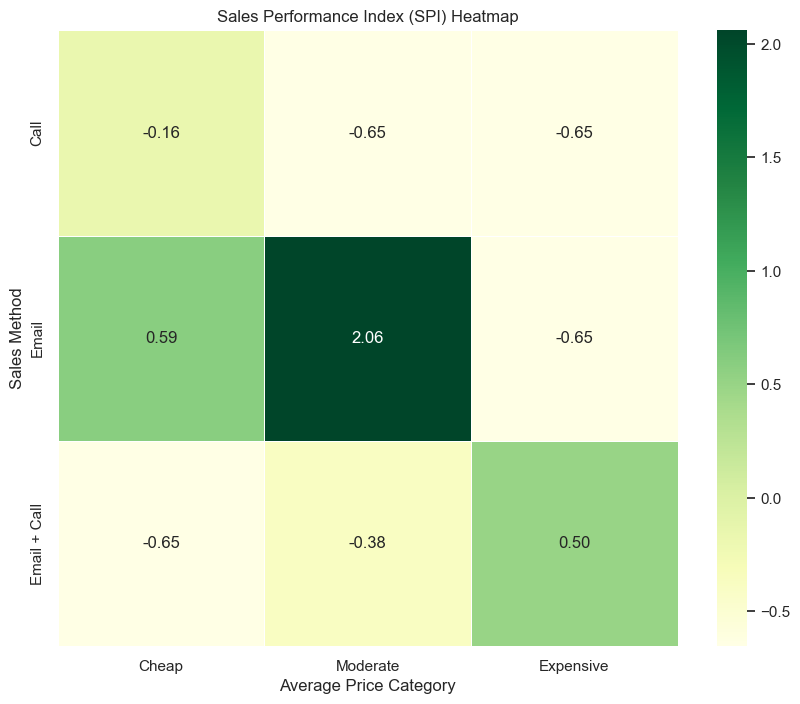

In [57]:
spi_reshape = spi_output.pivot("sales_method", "average_price_category", "SPI")

cmap = sns.diverging_palette(10, 133, l=60, n=100, center="dark")
# Create the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(spi_reshape, annot=True, fmt=".2f", cmap='YlGn' , linewidths=.5)
plt.title('Sales Performance Index (SPI) Heatmap')
plt.ylabel('Sales Method')
plt.xlabel('Average Price Category')
plt.show()

## Interpretation and Application
- A **higher SPI** indicates a sales method-category combination that is highly effective and efficient across multiple dimensions, suggesting that this approach could be prioritized or further optimized for better sales performance.
- A **lower SPI** might reveal areas where improvements are needed, either in increasing growth rate, boosting cumulative revenue, or improving operational efficiency.

If the "Email + Call" method exhibits a relatively low RPTU but a higher WRGR in recent weeks and a significant share of overall revenue (high CSE), its SPI will account for these factors, potentially ranking it highly for certain price categories. This nuanced view allows us to appreciate not just the immediate efficiency (RPTU) but also the method's ability to rapidly grow revenue (WRGR) and contribute significantly to total sales (CSE), providing strategic insights for sales optimization.

By synthesizing diverse aspects of sales performance into the SPI, we equip the sales team with a multifaceted understanding of how different strategies perform across various segments. This insight enables strategic decisions to allocate resources more effectively, tailor sales approaches, and ultimately drive better sales outcomes.

### Are there other differences between the customers in each group?
_Anything you can tell us would be really helpful to give some context to what went well._

In [58]:
product_sales_imputed['years_as_customer'].quantile(.75)

7.0

In [59]:
product_sales_imputed['years_as_customer'].quantile(.51)

4.0

By looking at the loyalty period distribution, we gain insight into the longevity of the customer base. 
Analysis of customer loyalty periods suggests that a significant portion of our customer base falls within the relatively newer segment, with less than 4 years of engagement. 

This trend can indicate both the success of recent growth strategies in acquiring new customers (**'Call' & 'Email + Call' capture ~80% of customers**) and a potential opportunity in fostering long-term relationships with them.

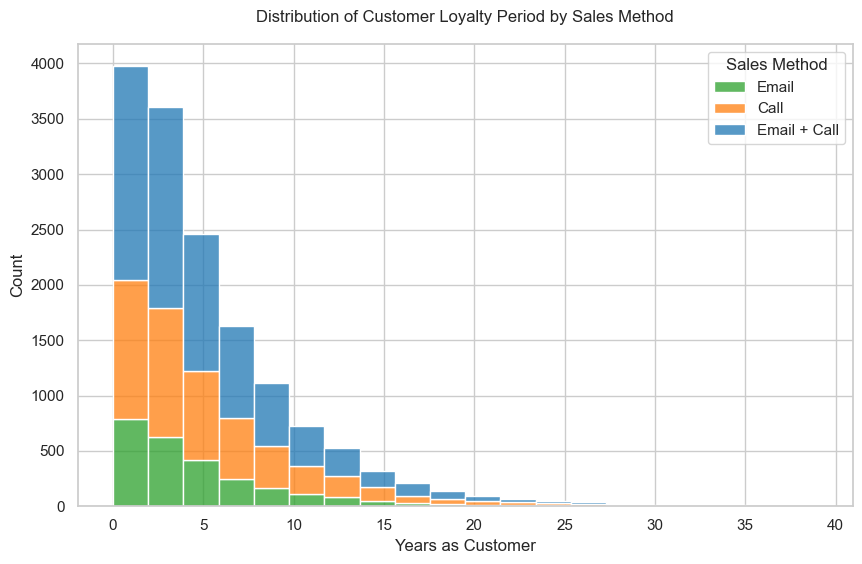

In [60]:
# Set the context for the plot
sns.set_context('notebook')

# Create the plot with histplot
plt.figure(figsize=(10, 6))
hist = sns.histplot(data=product_sales_imputed[product_sales_imputed['years_as_customer'] <=40], x='years_as_customer', hue='sales_method', multiple="stack", bins=20)

# If the legend is not showing up automatically, force it to display
plt.legend(title='Sales Method', labels=product_sales_imputed['sales_method'].unique())

# Set titles and labels
plt.title('Distribution of Customer Loyalty Period by Sales Method', y=1.03)
plt.xlabel('Years as Customer')
plt.ylabel('Count')

# Display the plot
plt.show()

For better utilization of the data, and ability to filter out customers with incorrect years_as_customer field values, I'll proceed with creating an additional category column based on the **years_as_customer** field.

I segmented the **years_as_customer** data into three quantile bins. This method automatically adjusts the range of each category based on the distribution of tenure within our customer data.

The resulted categories are as follows:

- **0 - 2 years**: New customers, capturing those in the earliest stages of their relationship with our company.
- **2 - 5 years**: Established customers, who have been with us long enough to demonstrate loyalty and engagement.
- **5+ years**: Long-term customers, reflecting a deep and enduring relationship with our brand.
- **Incorrect Value**: This category safeguards our analysis against data anomalies, including records that indicate a tenure outside our operational timeframe or other implausible values.

In [61]:
quantiles, bins = pd.qcut(product_sales_imputed['years_as_customer'], 3, labels=None, retbins=True, duplicates='drop')

bins[0] = float('-inf')  # Adjust to include any negative values as incorrect
bins[-1] = float('inf')  # Adjust to ensure values over 40 are categorized as incorrect

# Mapping quantile bins to custom categories
def categorize_years(year):
    if year > 40 or year < 0:
        return "Incorrect Value"
    elif year <= bins[1]:
        return "0 - 2 years"
    elif year <= bins[2]:
        return "2 - 5 years"
    else:
        return "5 + years"

product_sales_imputed['customer_tenure'] = product_sales_imputed['years_as_customer'].apply(categorize_years)

distribution = product_sales_imputed['customer_tenure'].value_counts()
distribution

0 - 2 years        5962
5 + years          4961
2 - 5 years        4075
Incorrect Value       2
Name: customer_tenure, dtype: int64

The boxplots of revenue distribution among customer tenure categories suggest that different sales methods provide similar results for customers of different tenure.

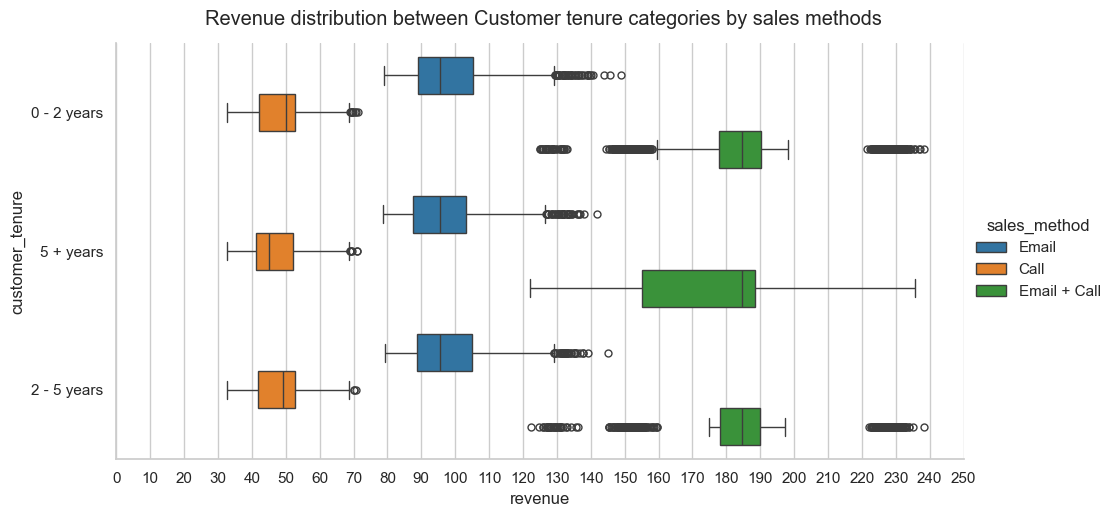

In [62]:
from matplotlib.ticker import MaxNLocator
g = sns.catplot(x = 'revenue', y = 'customer_tenure', data = product_sales_imputed[product_sales_imputed['customer_tenure'] != 'Incorrect Value'], kind = 'box', hue ='sales_method', height=5, aspect=2)
g.ax.set_xlim(0,250)
g.ax.xaxis.set_major_locator(MaxNLocator(nbins='25'))
g.fig.suptitle('Revenue distribution between Customer tenure categories by sales methods', y = 1.03)
plt.show()

In the context of site visits, no significant differences in frequency distribution by customer tenure is observed.

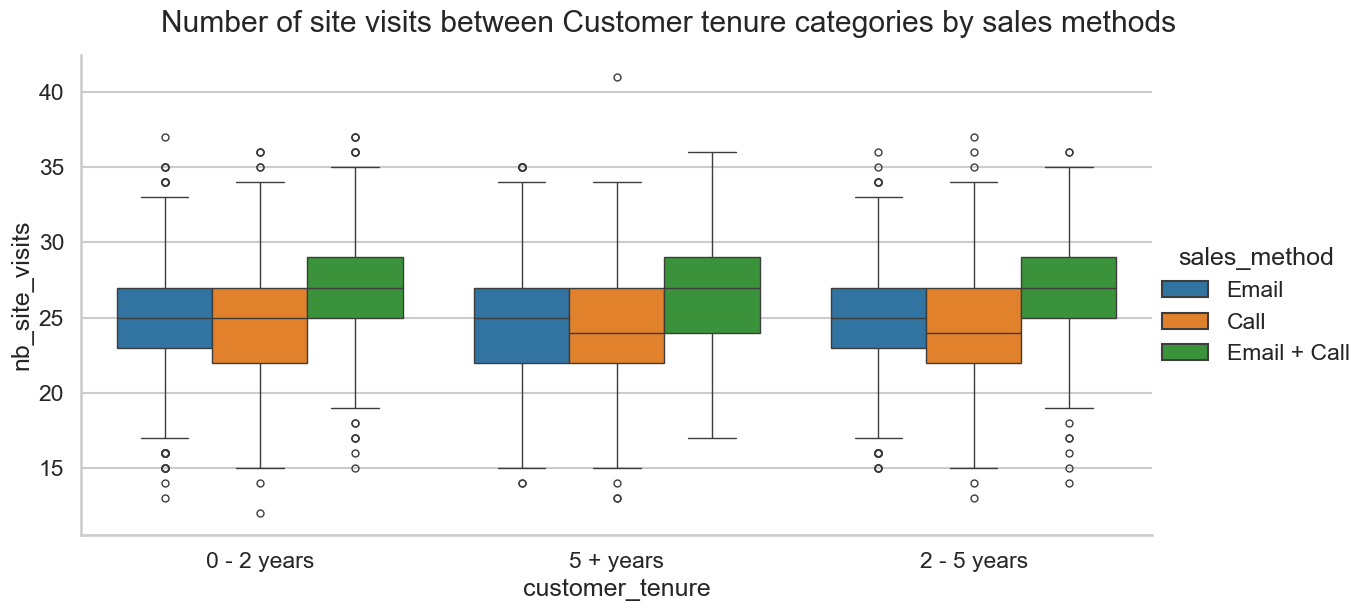

In [63]:
sns.set_context('talk')
g = sns.catplot(x = 'customer_tenure', y = 'nb_site_visits', data = product_sales_imputed[product_sales_imputed['customer_tenure'] != 'Incorrect Value'], kind = 'box', hue ='sales_method', height=6, aspect=2)
#g.ax.set_xlim(0,250)
g.fig.suptitle('Number of site visits between Customer tenure categories by sales methods', y = 1.03)
plt.show()

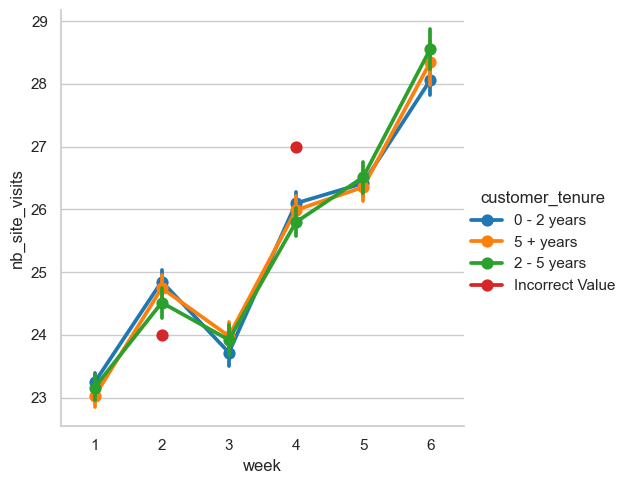

In [64]:
sns.set_context('notebook')
sns.catplot(x='week', y = 'nb_site_visits', data=product_sales_imputed, hue='customer_tenure', kind = 'point')
plt.show()

The boxplot illustrates the distribution of website visits by customers across different average price categories.
The spread of the data suggests variability in site engagement, with some indication that customers purchasing more expensive items tend to visit the site more frequently, as seen by the higher median and greater spread in the 'Expensive' category.

This pattern could be leveraged for targeted web-based marketing strategies, as these highly engaged customers may be more receptive to online promotions, product recommendations, and personalized content. By focusing marketing efforts on the website for the 'Expensive' category, the company could potentially increase conversion rates and encourage higher-value sales.

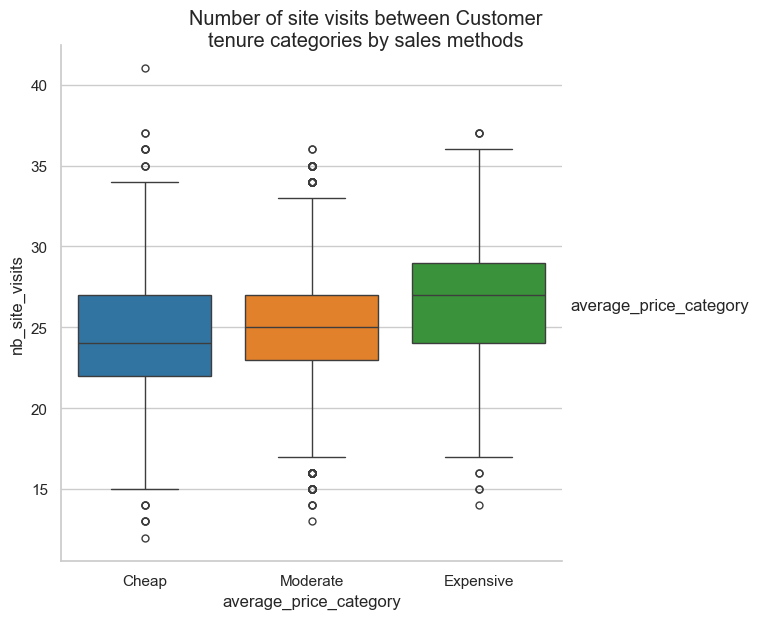

In [65]:
sns.set_context('notebook')
g = sns.catplot(x = 'average_price_category', y = 'nb_site_visits', data = product_sales_imputed, kind = 'box', hue ='average_price_category', height=6, aspect=1)
#g.ax.set_xlim(0,250)
g.fig.suptitle('Number of site visits between Customer\ntenure categories by sales methods', y = 1.03)
plt.show()

Lastly, the Pareto chart of total revenue by state highlights regional strengths and opportunities for growth, providing a geographic perspective on sales performance. For instance, around 50% of revenue comes from top 10 states by revenue, with leading California, Texas, NewYork and Florida, listed in paretto chart below:

<Figure size 3000x1000 with 0 Axes>

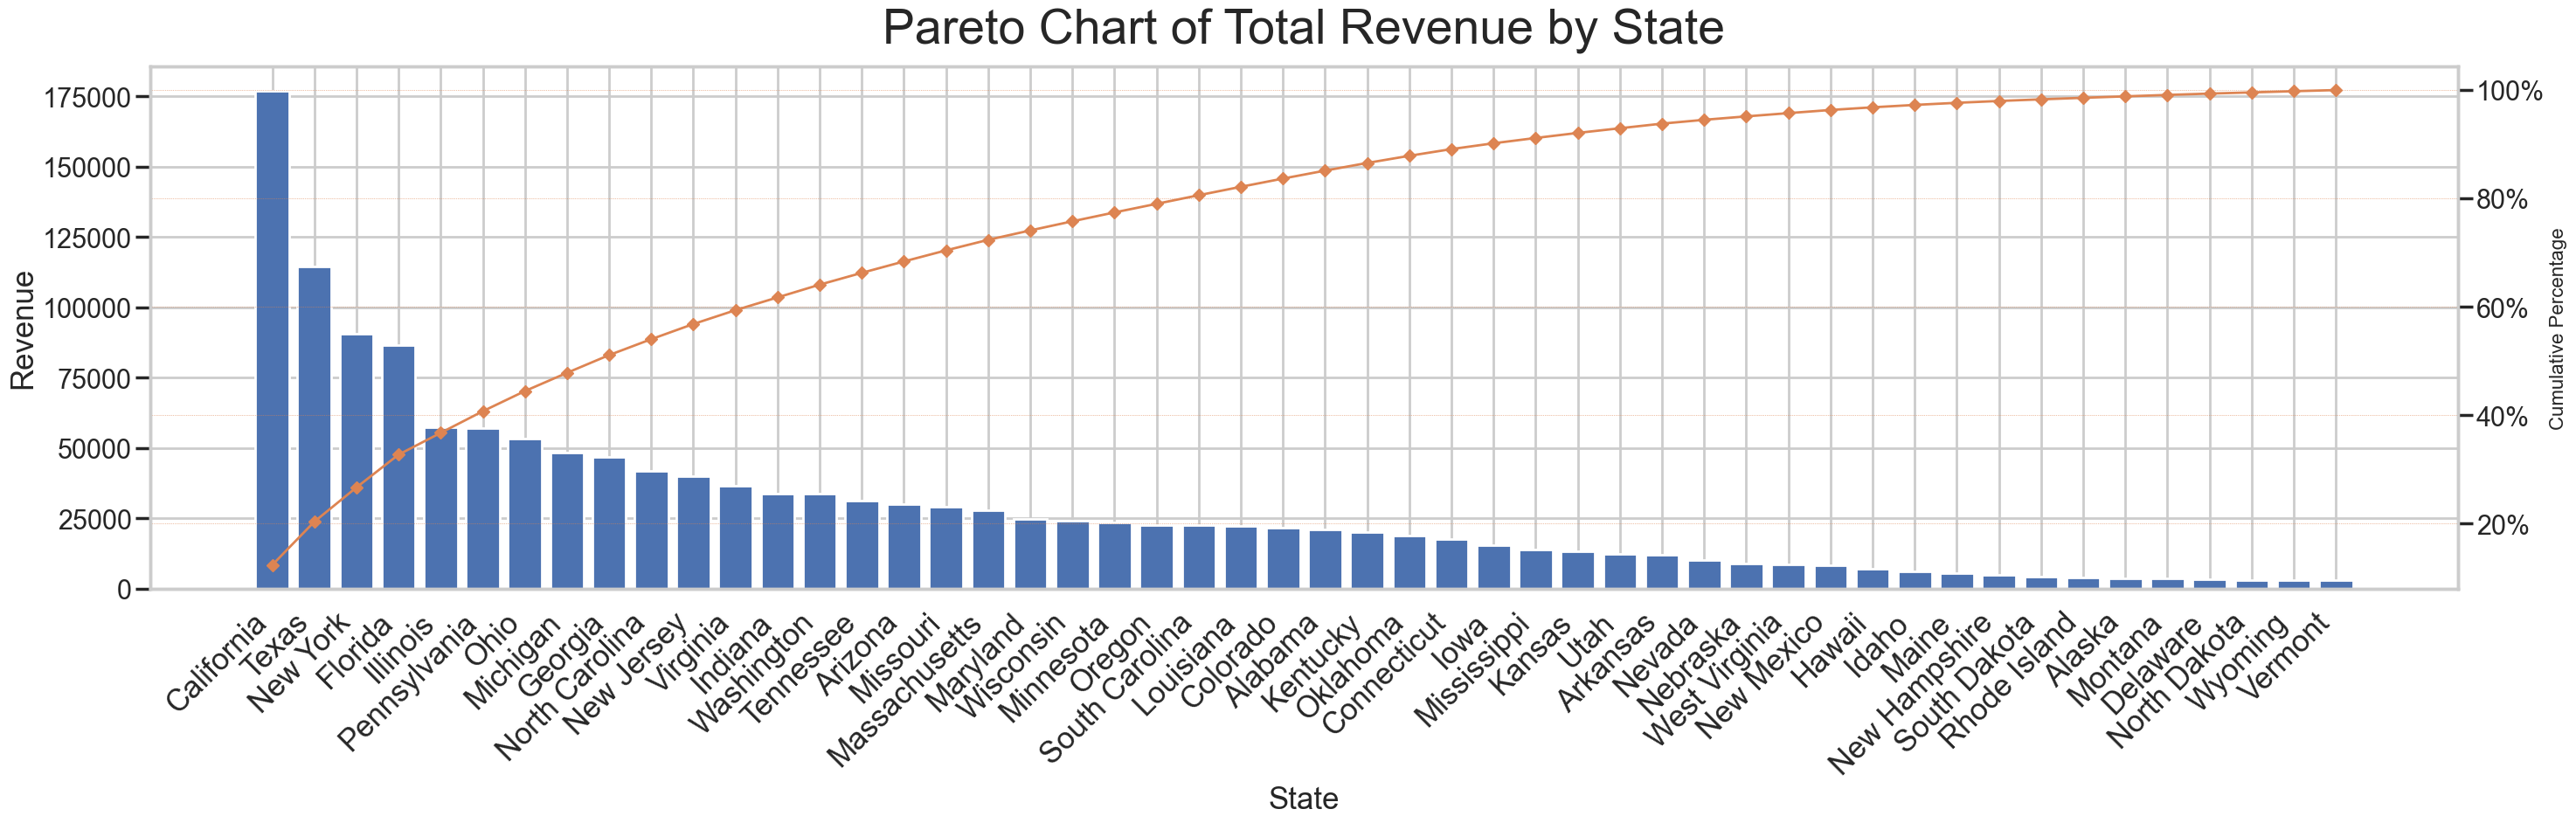

In [66]:
from matplotlib.ticker import FuncFormatter

# Assuming 'product_sales_imputed' is your DataFrame
# Aggregate the revenue by state
state_revenue = product_sales_imputed.groupby('state')['revenue'].sum().sort_values(ascending=False)

# Get the cumulative percentage
cumulative_percentage = 100 * state_revenue.cumsum() / state_revenue.sum()

# Create a new DataFrame for the Pareto chart
pareto_df = pd.DataFrame({'State': state_revenue.index, 'Cumulative_Percentage': cumulative_percentage})
pareto_df = pareto_df.reset_index(drop=True)

# Set the style of seaborn
sns.set(style="whitegrid")
sns.set_context('poster')
# Set the figure size here, with a wider width
plt.figure(figsize=(30, 10))  # Adjust the width as necessary
fig, ax = plt.subplots(figsize=(30, 10))  # Use the same size for the subplot

# Plot the bar chart on primary y-axis
ax.bar(pareto_df['State'], state_revenue, color="C0")

# Create a twin y-axis to plot the cumulative percentage line
ax2 = ax.twinx()
ax2.plot(pareto_df['State'], pareto_df['Cumulative_Percentage'], color="C1", marker="D", ms=7, lw=2)
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0f}%'.format(y)))

# Setting the axis labels and title
ax.set_xlabel('State', fontsize=25)
ax.set_ylabel('Revenue', fontsize=25)
ax2.set_ylabel('Cumulative Percentage', fontsize=16)
ax.set_title('Pareto Chart of Total Revenue by State', y = 1.03, fontsize=40)

# Rotate the State labels to avoid overlap
ax.set_xticklabels(pareto_df['State'], rotation=45, ha='right', fontsize=25)

# Adding grid lines for the second y-axis
ax2.grid(None)
ax2.grid(True, which='major', axis='y', linestyle='dotted', lw=0.5, color='C1')

# Tight layout for a clean look
plt.tight_layout()
plt.show()

In [67]:
product_sales_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 4773 to 4029
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   week                      15000 non-null  int64   
 1   sales_method              15000 non-null  object  
 2   customer_id               15000 non-null  object  
 3   nb_sold                   15000 non-null  int64   
 4   revenue                   15000 non-null  float64 
 5   years_as_customer         15000 non-null  int64   
 6   nb_site_visits            15000 non-null  int64   
 7   state                     15000 non-null  object  
 8   average_price             15000 non-null  float64 
 9   average_price_category    15000 non-null  category
 10  cumulative_revenue        15000 non-null  float64 
 11  minutes_per_sale          15000 non-null  float64 
 12  revenue_per_minute_spent  15000 non-null  float64 
 13  customer_tenure           15000 non-null  ob

## Recommendations for Business:

**Align Product Strategies with the Most Effective Sales Method for Each Price Category**:
- **Maximize the 'Email' Method**: Given its strong overall performance and particularly notable efficiency with moderate-priced items, the 'Email' method should be maximized for future product launches and marketing campaigns. This approach not only ensures a broad reach with minimal effort but also capitalizes on the method's proven success in generating significant revenue.
- **Prioritize Selective Application of 'Email + Call' Method**: This method's effectiveness in engaging customers for high-value purchases warrants its strategic use for premium sales. The 'Email + Call' method has also demonstrated potential for high-value sales and growing average revenue per week.
- **Reassess the 'Call' Method**: Given its lower average revenue and higher time cost, the 'Call' method should be deprioritized for direct revenue generation. Instead, focus on leveraging this method to build deeper relationships with long-term and loyal customers, especially for lower-priced items.

**Data-Driven Approach**: Continuously Monitor the SPI as a comprehensive metric that allows for the monitoring of changes in sales performance across methods and customer segments. This data-driven approach supports agile adjustments to strategies, maximizing revenue while optimizing the efficiency of sales activities.

**Engage Newer Customer Segments**: With a significant portion of the customer base being relatively new, it's crucial to focus on retention strategies that enhance loyalty and lifetime value. Tailoring sales approaches, especially the 'Email + Call' method for high-value interactions, can effectively engage and retain these customers.

**Geographic and Online Engagement Opportunities:**
- **Leverage Geographic Insights**: The analysis of revenue distribution by state offers valuable insights into regional market strengths and potential growth opportunities. Allocating resources and tailoring marketing efforts to high-performing regions can enhance sales performance and market penetration.
- **Maximize Online Engagement for High-Value Sales**: The observed pattern of website visits, particularly among customers interested in expensive items, underscores the importance of targeted online engagement. Utilizing personalized content, promotions, and product recommendations on the website can increase conversion rates and encourage higher-value purchases.

**Improve Data Quality**: Refine Sales Method Categorization and Revenue Tracking. Correcting anomalies, such as years as customers that exceed the company's operational lifespan, and incorporating detailed information on repeat purchase behavior and specific items bought will offer deeper insights into sales performance and customer preferences.

## Conclusion:

Leveraging the 'Email' method for its efficiency and effectiveness across a moderate-sales customer base, while selectively employing the 'Email + Call' method for high-value sales, provides a balanced strategy that maximizes revenue with minimal effort. The reassessment of the 'Call' method should focus on its role in building deeper customer relationships. Continuous monitoring of sales performance through the SPI, alongside strategic targeting based on customer segmentation and online engagement patterns, can further optimize sales strategies, drive revenue growth, and enhance customer retention.

These recommendations aim to align sales strategies with the company's goals of maximizing efficiency and revenue while ensuring customer satisfaction and loyalty. By focusing on data-driven decision-making and strategic use of sales methods tailored to different segments and product categories, Pens and Printers can improve sales effectiveness, customer retention, and overall revenue growth.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation